## Lab3 Part 2

Lab3 is splitted into two parts as it is gettign really long.
## Task 5.1 Dynamic Programming
The goal of this second half of the lab is to investigate dynamic progamming along scanlines in stereo vision.  In this part of the practical, we build a basic dynamic programming algorithm, which will solve the same problem as presented in the notes.  

In Task5 we will apply this to the stereo problem.  

Use the template below, filling in parts marked "TO DO" (only todo for Task 5.1 one is in functions.py).



In [2]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import matplotlib.pyplot as plt

from functions import dynamicProgram, dynamicProgramVec

In [3]:
# define unary costs : unaryCosts[d,j] represents the cost for having
# disparity d at pixel j.
unaryCosts = np.array([[2.0, 1.1, 5.7, 1.5, 6.0, 3.1],
              [0.8, 4.8, 1.0, 3.0, 6.9, 3.3],
              [4.3, 2.3, 2.4, 2.4, 6.6, 6.2],
              [6.4, 0.0, 6.1, 0.8, 7.1, 2.1],
              [2.3, 2.2, 4.9, 8.9, 1.0, 9.8]])

# define pairwise costs:  pairwiseCosts[a,b] represents the cost for changing from 
# disparity level A at pixel j to disparity level B at pixel j+1;
pairwiseCosts = np.array([[   0,   2, 100, 100, 100],
                          [   2,   0,   2, 100, 100],
                          [ 100,   2,   0,   2, 100],
                          [ 100, 100,   2,   0,   2],
                          [ 100, 100, 100,   2,   0]])



In [4]:
# TODO Fill in the dynamicProgram function in "functions.py"
import numpy as np
# the goal of this routine is to return the minimum cost dynamic programming
# solution given a set of unary and pairwise costs
def dynamicProgram(unaryCosts, pairwiseCosts):

    # count number of positions (i.e. pixels in the scanline), and nodes at each
    # position (i.e. the number of distinct possible disparities at each position)
    nNodesPerPosition = len(unaryCosts)
    nPosition = len(unaryCosts[0])

    # define minimum cost matrix - each element will eventually contain
    # the minimum cost to reach this node from the left hand side.
    # We will update it as we move from left to right
    minimumCost = np.zeros([nNodesPerPosition, nPosition])

    # define parent matrix - each element will contain the (vertical) index of
    # the node that preceded it on the path.  Since the first column has no
    # parents, we will leave it set to zeros.
    parents = np.zeros([nNodesPerPosition, nPosition])

    # FORWARD PASS

    # TODO:  fill in first column of minimum cost matrix
    for cNode in range(nNodesPerPosition):
        minimumCost[cNode, 0] = unaryCosts[cNode][0]   


    # Now run through each position (column)
    for cPosition in range(1,nPosition):
        # run through each node (element of column)
        for cNode in range(nNodesPerPosition):
            # now we find the costs of all paths from the previous column to this node
            possPathCosts = np.zeros([nNodesPerPosition,1])
            for cPrevNode in range(nNodesPerPosition):
                # TODO  - fill in elements of possPathCosts
                possPathCosts[cPrevNode,0] = (minimumCost[cPrevNode, cPosition-1] + pairwiseCosts[cPrevNode, cNode])


            # TODO - find the minimum of the possible paths 
            minCost = np.min(possPathCosts)
            ind = np.argmin(possPathCosts)
            
            # Assertion to check that there is only one minimum cost.
            # assert(len(np.where(possPathCosts == minCost)[0]) == 1)

            # TODO - store the minimum cost in the minimumCost matrix
            minimumCost[cNode, cPosition] = unaryCosts[cNode][cPosition] + minCost

            
            # TODO - store the parent index in the parents matrix
            parents[cNode, cPosition] = ind


    #BACKWARD PASS

    #we will now fill in the bestPath vector
    bestPath = np.zeros([nPosition,1])
    
    #TODO  - find the index of the overall minimum cost from the last column and put this
    #into the last entry of best path
    minCost = np.min(minimumCost[:, -1])
    minInd = np.argmin(minimumCost[:, -1])
    bestPath[-1] = minInd

    # TODO - find the parent of the node you just found
    bestParent = minInd

    # run backwards through the cost matrix tracing the best patch
    for cPosition in range(nPosition-2,-1,-1):
        # TODO - work through matrix backwards, updating bestPath by tracing parents
        bestPath[cPosition] = parents[int(bestParent), cPosition+1]
        bestParent = bestPath[cPosition]

    # TODO: REMOVE THIS WHEN YOU ARE DONE
    # bestPath = np.floor(np.random.random(nPosition)*nNodesPerPosition)
    return bestPath


def dynamicProgramVec(unaryCosts, pairwiseCosts):
    
    # same preprocessing code
    
    # count number of positions (i.e. pixels in the scanline), and nodes at each
    # position (i.e. the number of distinct possible disparities at each position)
    nNodesPerPosition = len(unaryCosts)
    nPosition = len(unaryCosts[0])

    # define minimum cost matrix - each element will eventually contain
    # the minimum cost to reach this node from the left hand side.
    # We will update it as we move from left to right
    minimumCost = np.zeros([nNodesPerPosition, nPosition])

    # TODO: fill this function in. (hint use tiling and perform calculations columnwise with matricies)

    parents = np.zeros([nNodesPerPosition, nPosition])

    unaryCosts = np.array(unaryCosts)
    pairwiseCosts = np.array(pairwiseCosts)

    minimumCost[:, 0] = unaryCosts[:, 0]

    for c in range(1, nPosition):

        prev = minimumCost[:, c-1].reshape(-1, 1)        
        transitionCost = prev + pairwiseCosts           

        minCost = np.min(transitionCost, axis=0)        
        minInd  = np.argmin(transitionCost, axis=0)     

        minimumCost[:, c] = unaryCosts[:, c] + minCost
        parents[:, c] = minInd

    bestPath = np.zeros(nPosition, dtype=int)

    bestPath[-1] = np.argmin(minimumCost[:, -1])
    parent = bestPath[-1]

    for c in range(nPosition-2, -1, -1):
        bestPath[c] = parents[parent, c+1]
        parent = bestPath[c]

    # TODO: REMOVE THIS WHEN YOU ARE DONE
    # bestPath = np.floor(np.random.random(nPosition)*nNodesPerPosition)

    return bestPath

/tmp/ipykernel_14862/3907050100.py:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bestPath[cPosition] = parents[int(bestParent), cPosition+1]


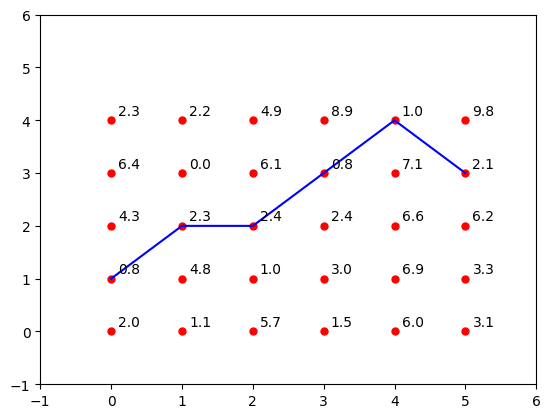

Path Cost = 17.4


In [5]:

# Now, use dynamic programming to find best solution.
bestPath = dynamicProgram(unaryCosts,pairwiseCosts)

# display the nodes
nY = len(unaryCosts)
nX = len(unaryCosts[0])
plt.axis([-1, 6, -1, 6])
for cY in range(nY):
    for cX in range(nX):
        plt.plot(cX,cY,'ro',ms=5.)
        plt.text(cX+.1, cY+.1, unaryCosts[cY,cX])


# display the best path
plt.plot(range(nX),bestPath,'b-')
plt.show()

# calculate the cost of the path computed
bestPathCostUnary = np.sum((np.transpose(unaryCosts).reshape((nX*nY,1)))[(np.add(nY * np.array(range(nX)),np.transpose(bestPath)[0])).astype(int)])
bestPathCostPairwise = np.sum(np.transpose(pairwiseCosts).reshape((nY*nY,1))[np.array([bestPath[0:-1]+nY*bestPath[1:]]).reshape((1,nY)).astype(int)[0]])
bestCost = bestPathCostUnary+bestPathCostPairwise
print('Path Cost =',bestCost)

## Task 5.2 Dynamic Programming for stereo depth estimation


The goal of this part of the practical is to use the dynamic programming routine that you developed in the first part to solve the dense stero problem.

Use the template below, filling in parts marked "TO DO".

### Extra Tasks:
Task hint: Crop or downsample your image if your stereo is slow

Task1: Capture or find two image pairs: one with good stereo depth and one with bad stereo depth result. Note that should have you camera moved horizontally (in parallel to the circuit board plane) with a baseline, and there should be no moving objects in the scene.

Task2: Measure your baseline distance between the camera with a ruler, does the depth esimation match the real distance？

Task3: (Unmarked Optional) Can you use two cameras at the same time for stereo capture?

In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np 
from scipy.io import loadmat
import matplotlib.pyplot as plt
import time
import math
from functions import dynamicProgram, dynamicProgramVec
import cv2
plt.close('all')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# load in images and ground truth
data = loadmat('/home/ramonalhk/Desktop/COMP0241/COMP0241_Lab/comp0241_25/dataset/StereoData.mat')
im1 = data['im1'].astype('int')
im2 = data['im2'].astype('int')
gt = data['gt'].astype('int')

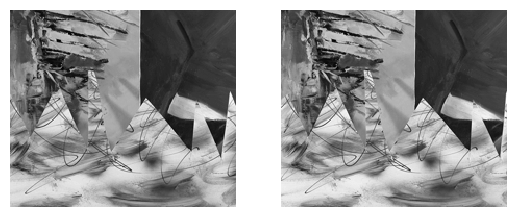

In [14]:
# ground truth disparity is originally expressed in 16'ths of pixels but we 
# will only consider whole-pixel shifts
gtDisp = np.round(gt.astype(float)/16)

im1show = im1
im2show = im2
if np.max(im1) > 1:
    im1show = im1.astype(float)/255.
    im2show = im2.astype(float)/255.
    
# display image
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(im1, cmap='gray', interpolation='nearest', aspect=1)
ax1.axis('off')
ax2.imshow(im2, cmap='gray', interpolation='nearest', aspect=1)
ax2.axis('off')
plt.show()

### Complete the TODOs in the final cell below

Here we are going to make use of the "dynamicProgram" function we just wrote.

We will first calculate the unary costs before using our function to calculate estimated disparity.

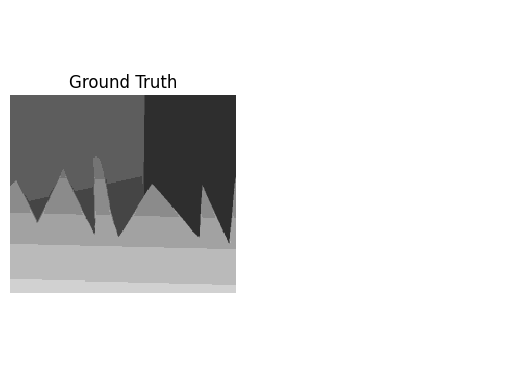

Procesing scanline  0


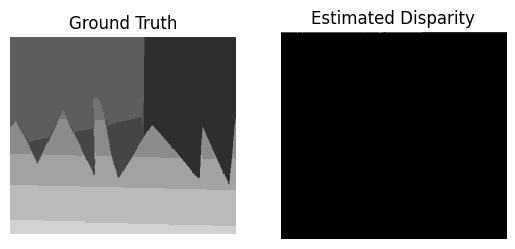

Procesing scanline  1


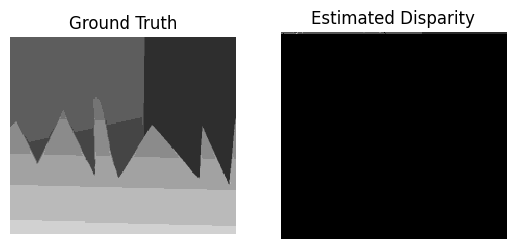

Procesing scanline  2


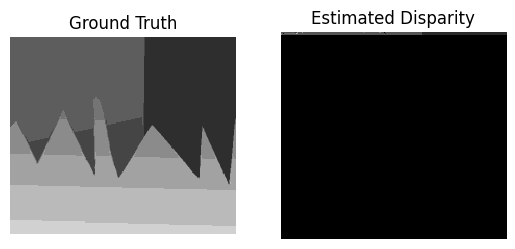

Procesing scanline  3


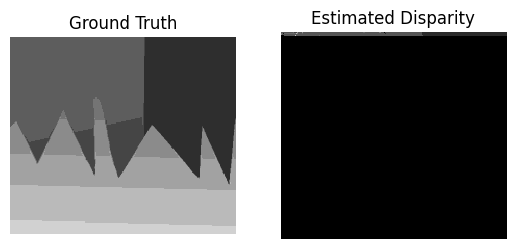

Procesing scanline  4


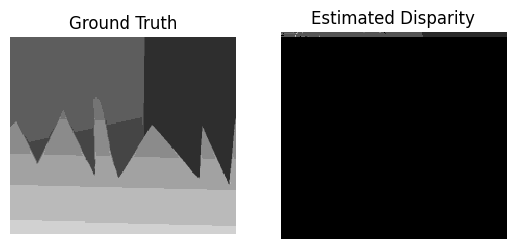

Procesing scanline  5


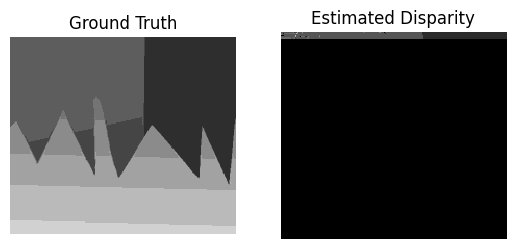

Procesing scanline  6


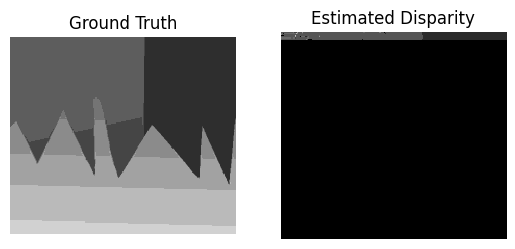

Procesing scanline  7


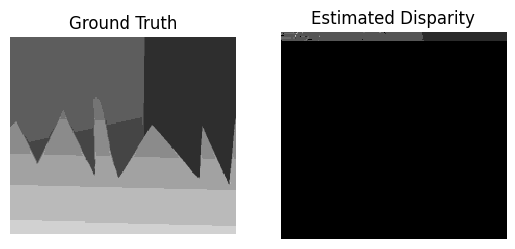

Procesing scanline  8


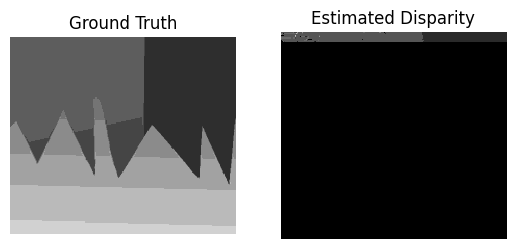

Procesing scanline  9


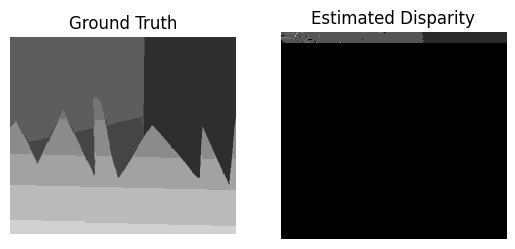

Procesing scanline  10


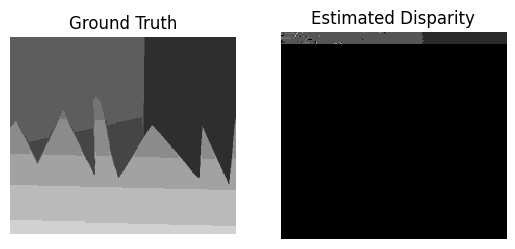

Procesing scanline  11


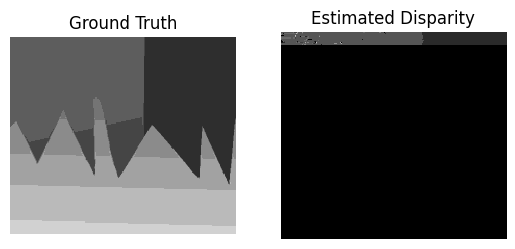

Procesing scanline  12


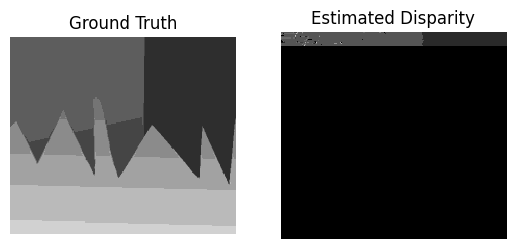

Procesing scanline  13


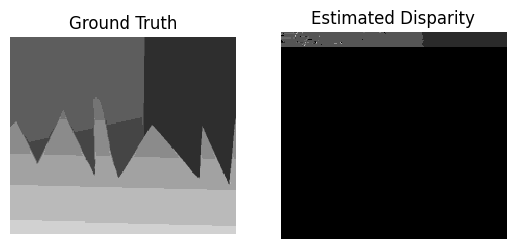

Procesing scanline  14


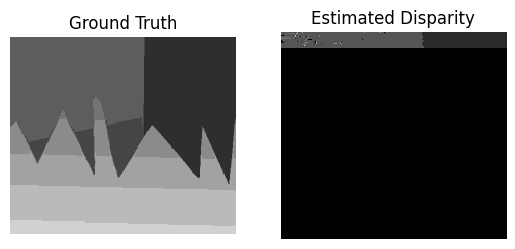

Procesing scanline  15


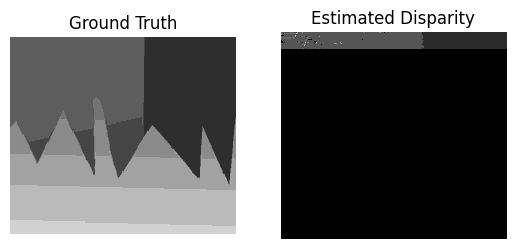

Procesing scanline  16


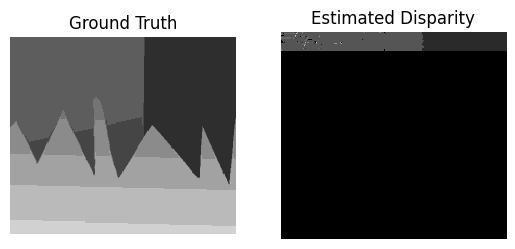

Procesing scanline  17


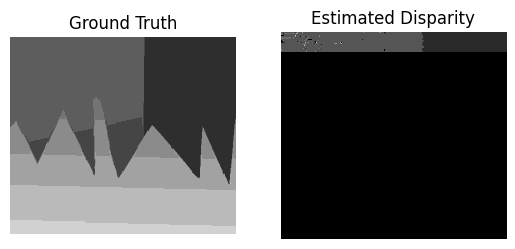

Procesing scanline  18


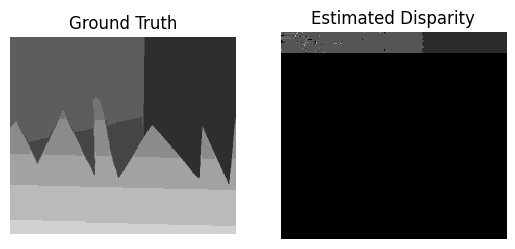

Procesing scanline  19


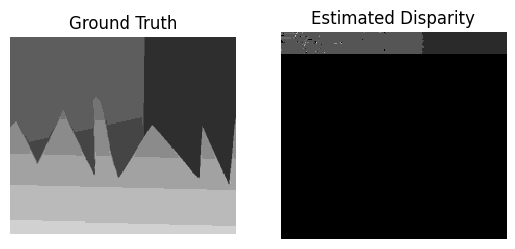

Procesing scanline  20


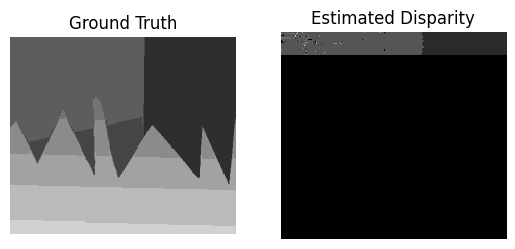

Procesing scanline  21


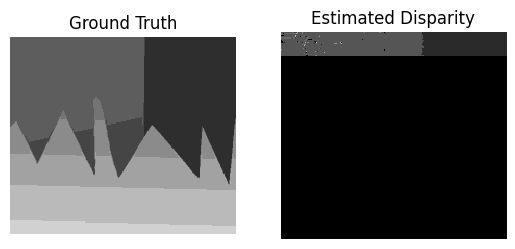

Procesing scanline  22


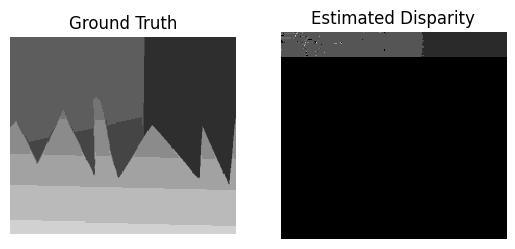

Procesing scanline  23


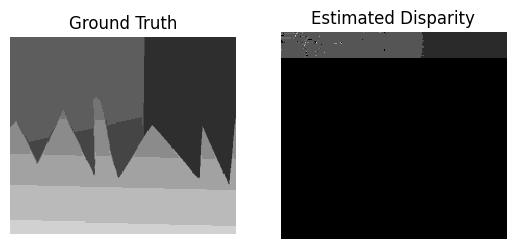

Procesing scanline  24


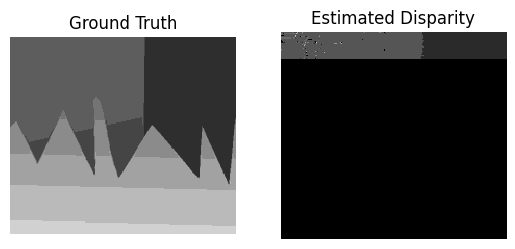

Procesing scanline  25


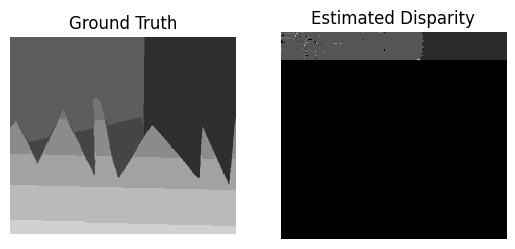

Procesing scanline  26


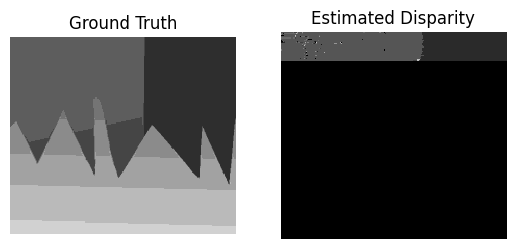

Procesing scanline  27


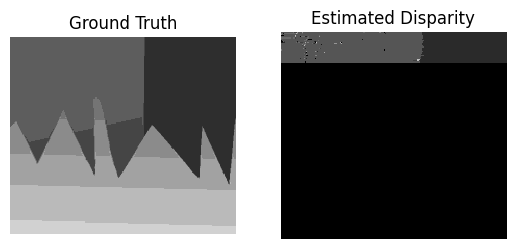

Procesing scanline  28


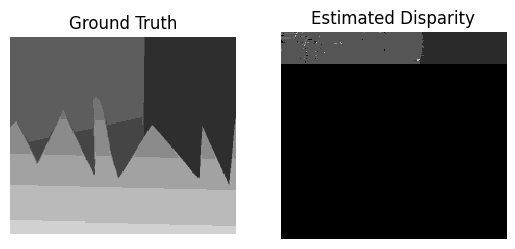

Procesing scanline  29


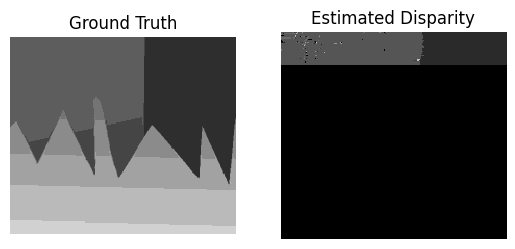

Procesing scanline  30


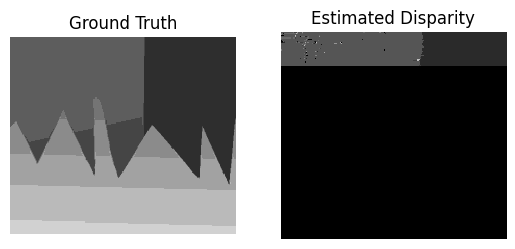

Procesing scanline  31


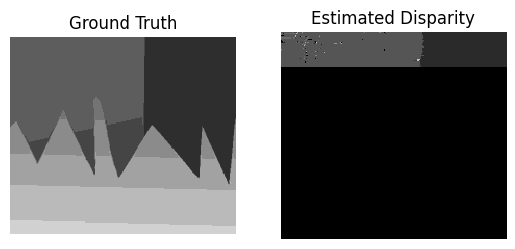

Procesing scanline  32


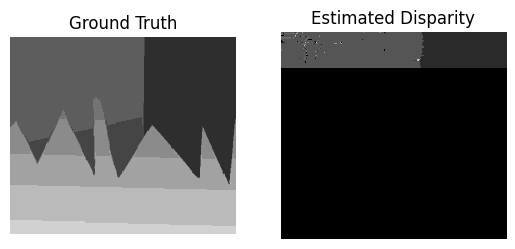

Procesing scanline  33


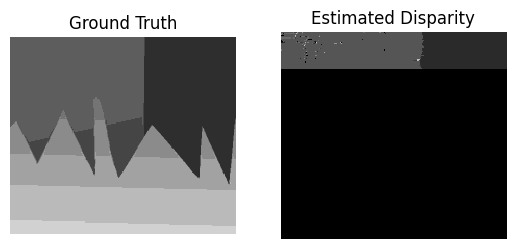

Procesing scanline  34


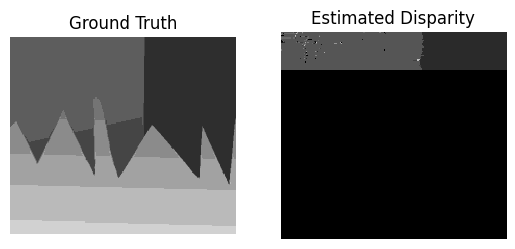

Procesing scanline  35


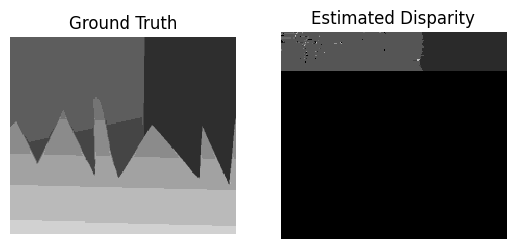

Procesing scanline  36


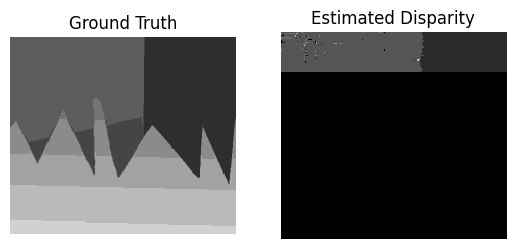

Procesing scanline  37


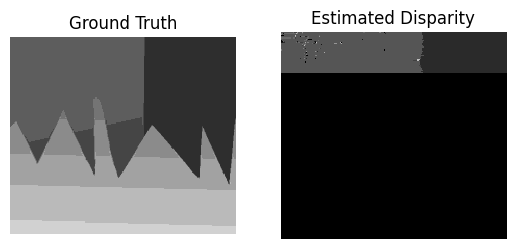

Procesing scanline  38


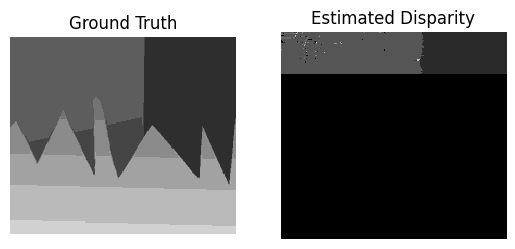

Procesing scanline  39


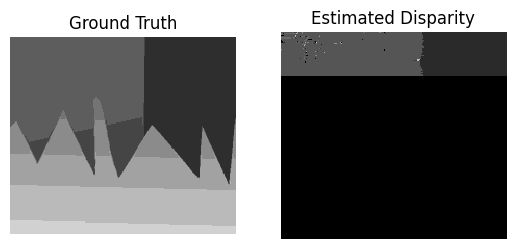

Procesing scanline  40


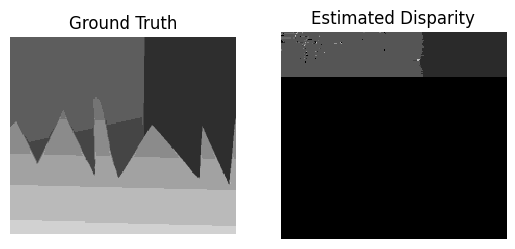

Procesing scanline  41


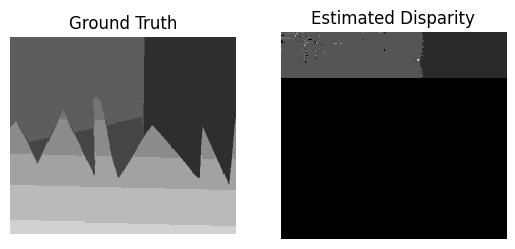

Procesing scanline  42


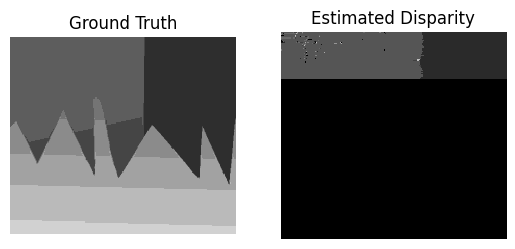

Procesing scanline  43


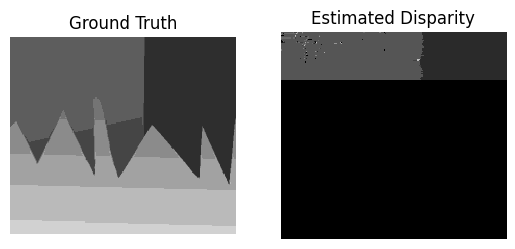

Procesing scanline  44


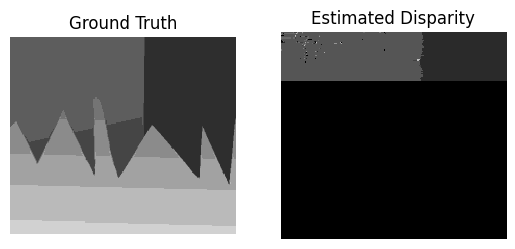

Procesing scanline  45


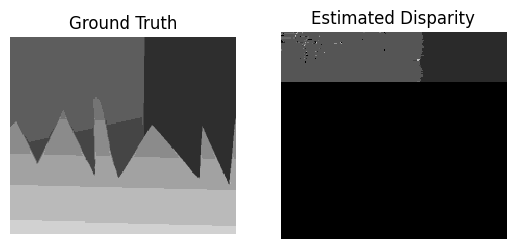

Procesing scanline  46


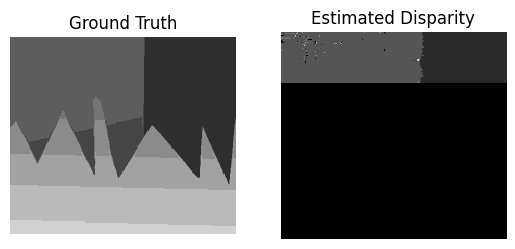

Procesing scanline  47


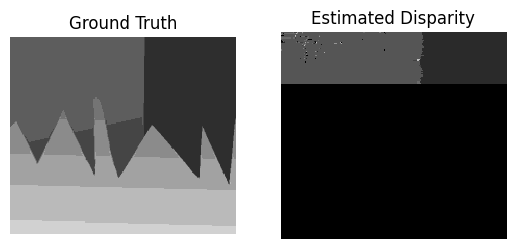

Procesing scanline  48


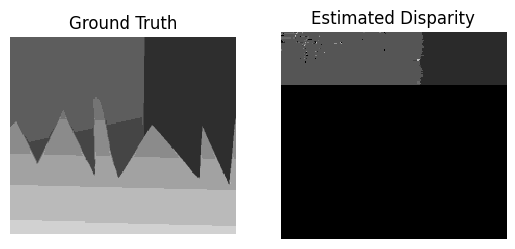

Procesing scanline  49


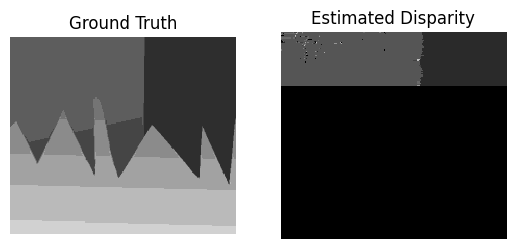

Procesing scanline  50


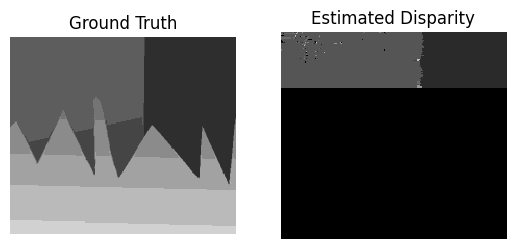

Procesing scanline  51


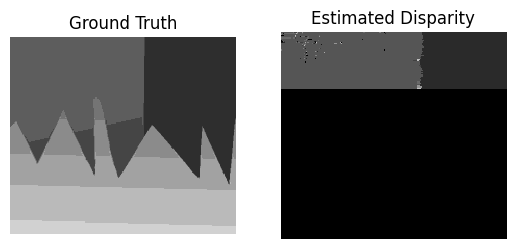

Procesing scanline  52


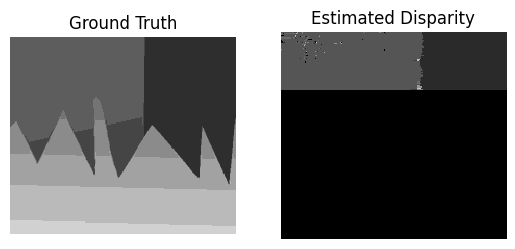

Procesing scanline  53


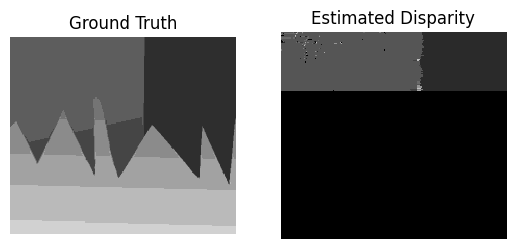

Procesing scanline  54


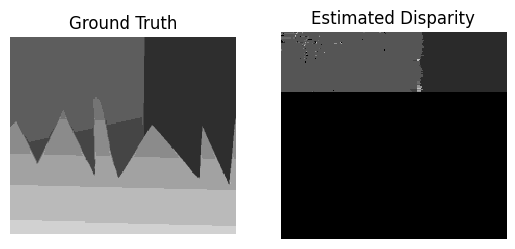

Procesing scanline  55


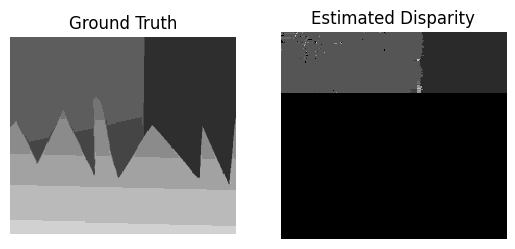

Procesing scanline  56


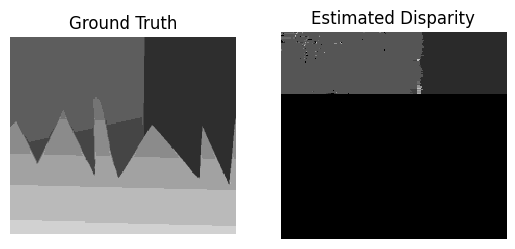

Procesing scanline  57


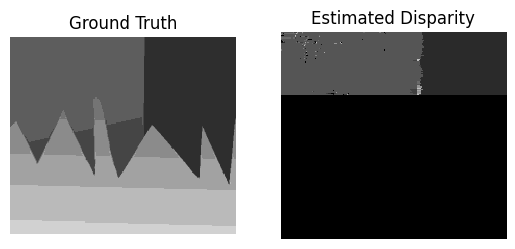

Procesing scanline  58


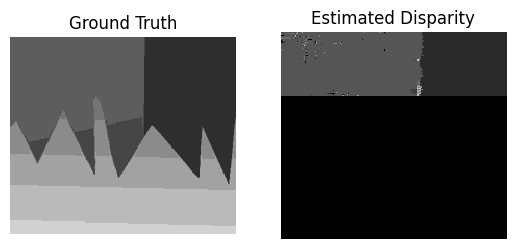

Procesing scanline  59


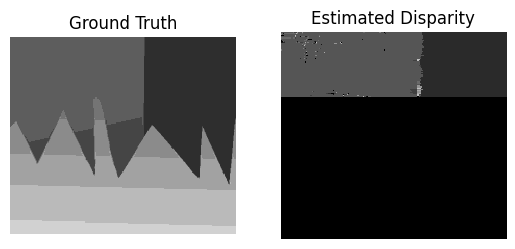

Procesing scanline  60


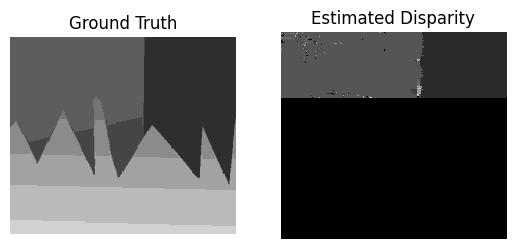

Procesing scanline  61


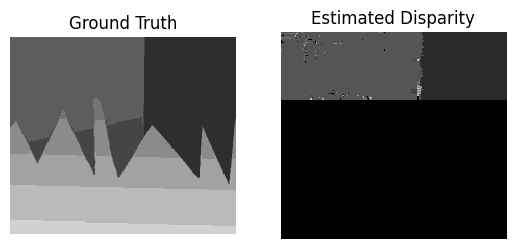

Procesing scanline  62


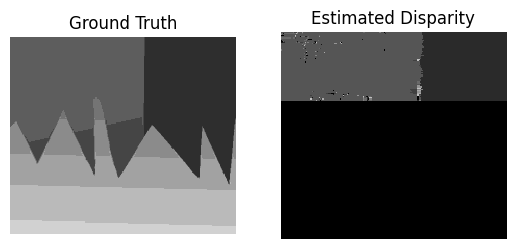

Procesing scanline  63


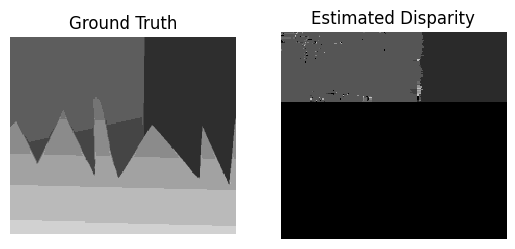

Procesing scanline  64


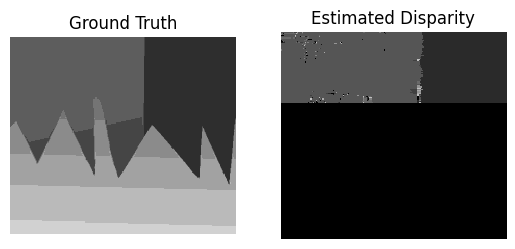

Procesing scanline  65


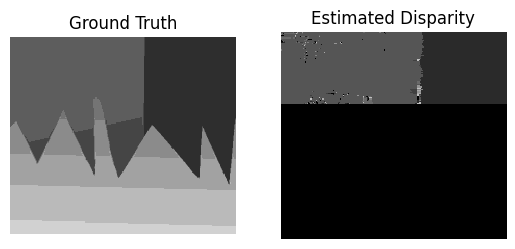

Procesing scanline  66


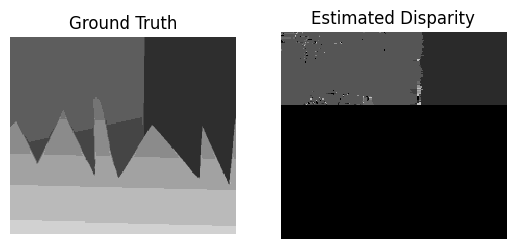

Procesing scanline  67


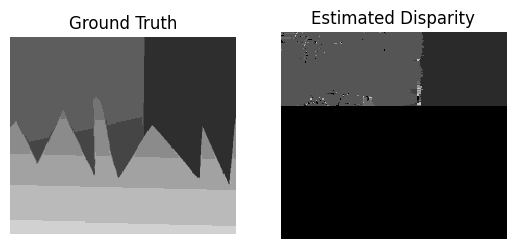

Procesing scanline  68


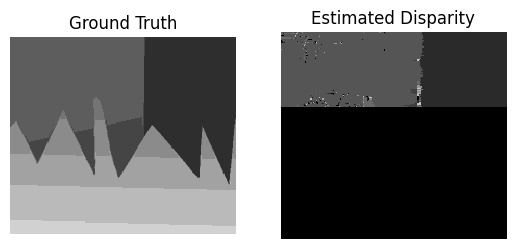

Procesing scanline  69


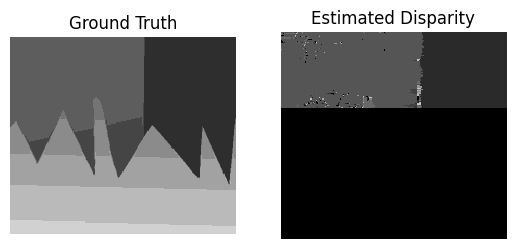

Procesing scanline  70


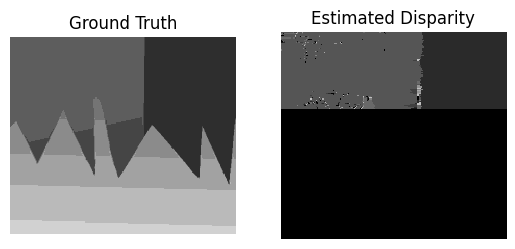

Procesing scanline  71


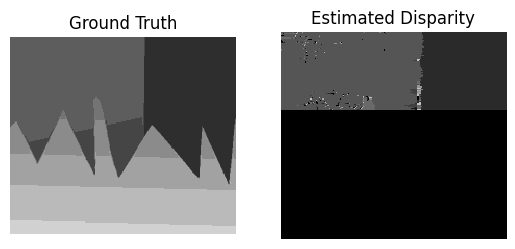

Procesing scanline  72


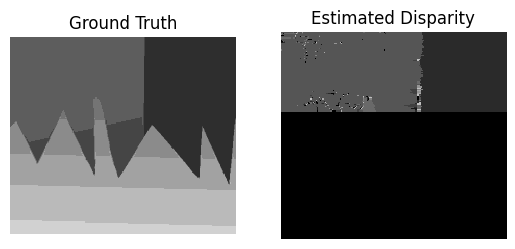

Procesing scanline  73


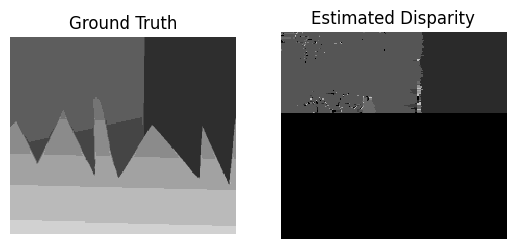

Procesing scanline  74


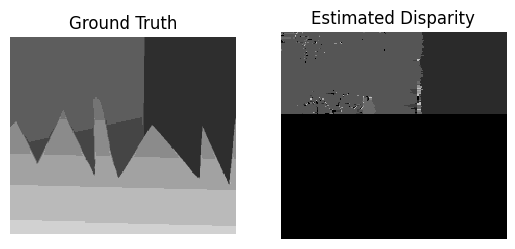

Procesing scanline  75


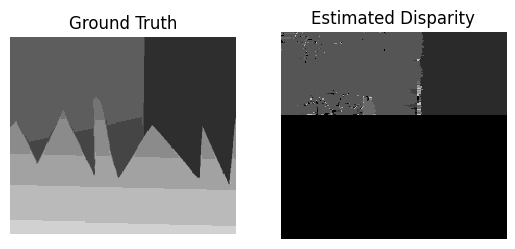

Procesing scanline  76


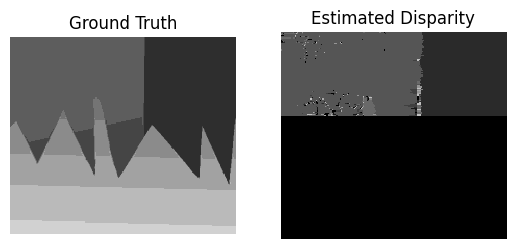

Procesing scanline  77


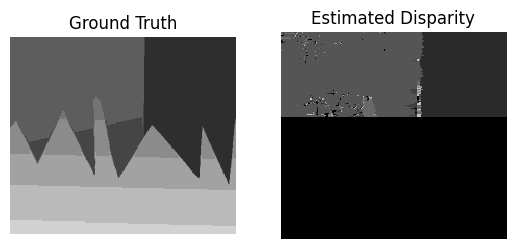

Procesing scanline  78


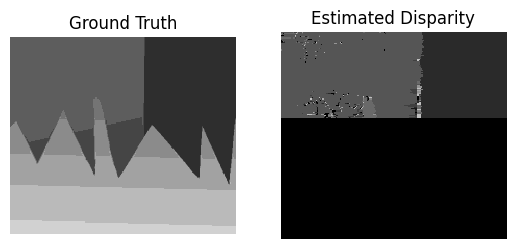

Procesing scanline  79


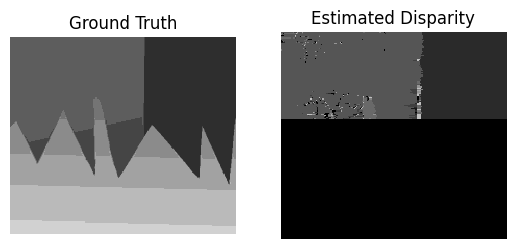

Procesing scanline  80


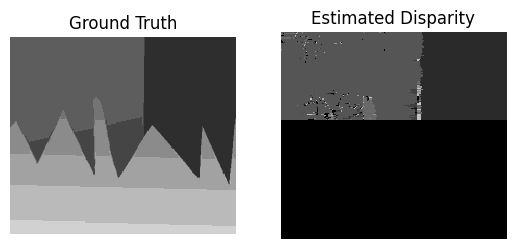

Procesing scanline  81


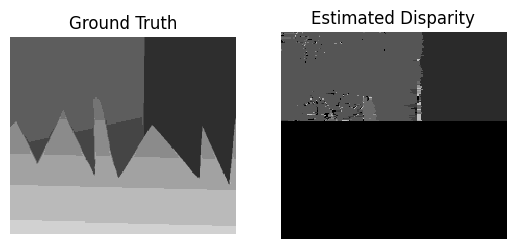

Procesing scanline  82


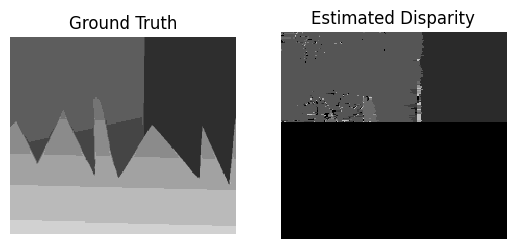

Procesing scanline  83


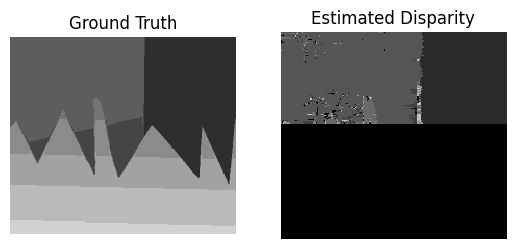

Procesing scanline  84


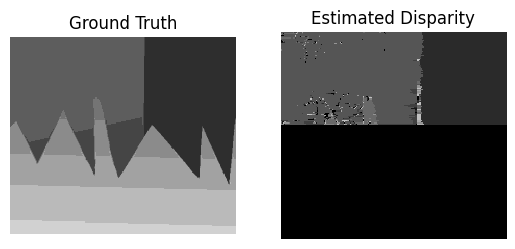

Procesing scanline  85


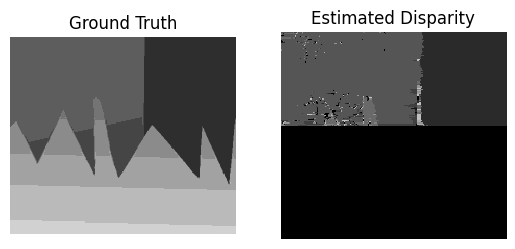

Procesing scanline  86


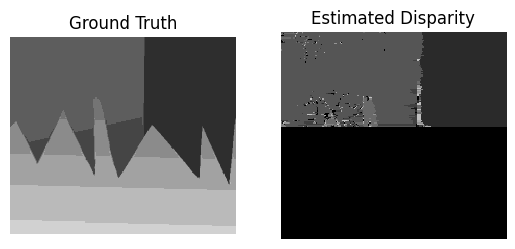

Procesing scanline  87


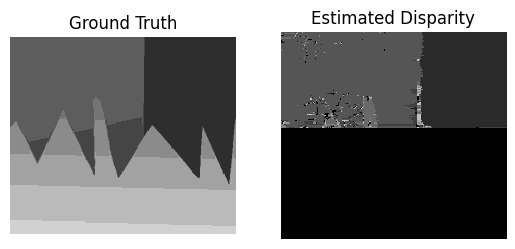

Procesing scanline  88


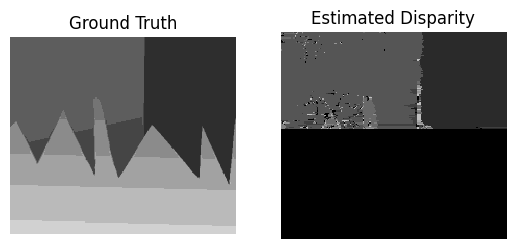

Procesing scanline  89


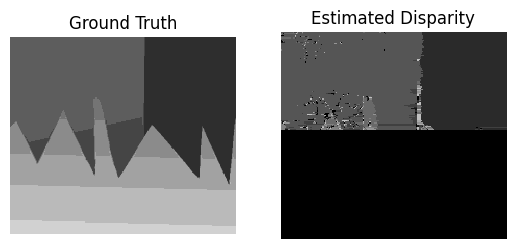

Procesing scanline  90


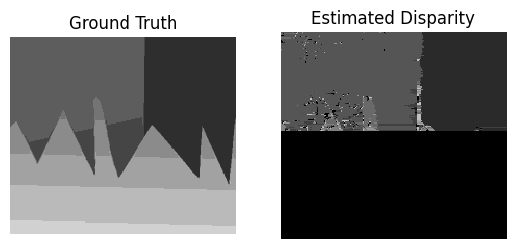

Procesing scanline  91


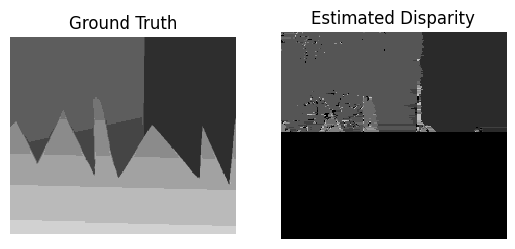

Procesing scanline  92


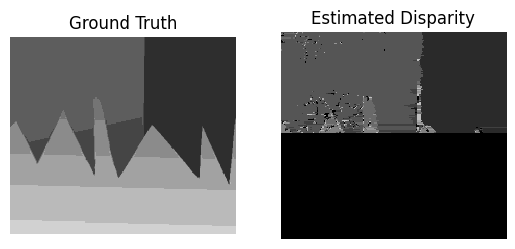

Procesing scanline  93


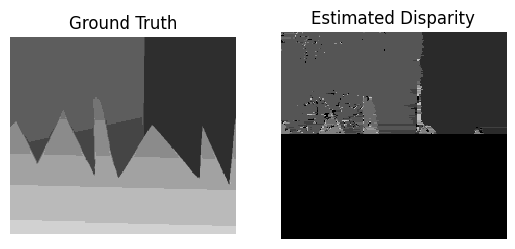

Procesing scanline  94


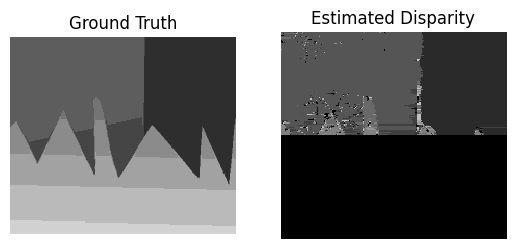

Procesing scanline  95


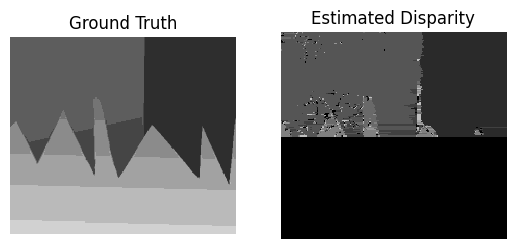

Procesing scanline  96


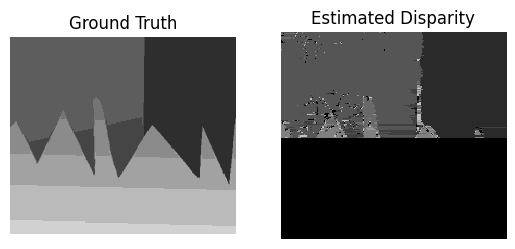

Procesing scanline  97


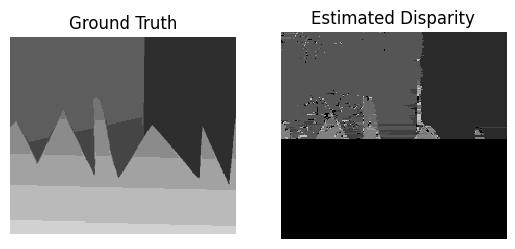

Procesing scanline  98


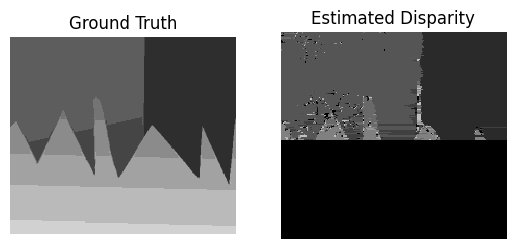

Procesing scanline  99


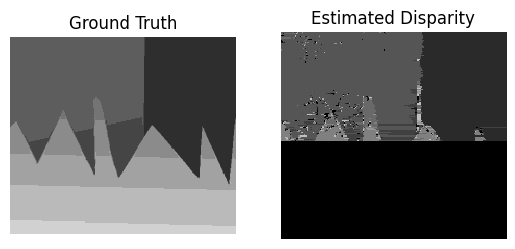

Procesing scanline  100


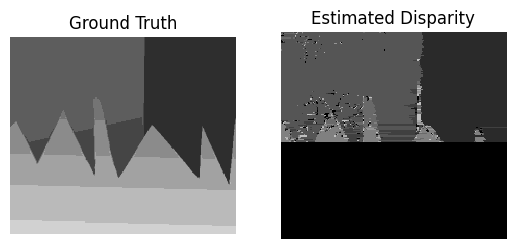

Procesing scanline  101


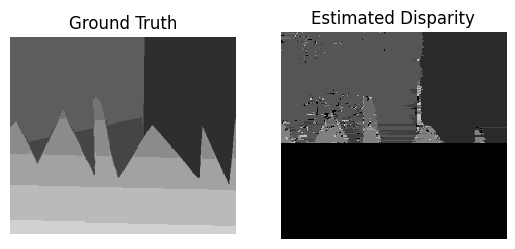

Procesing scanline  102


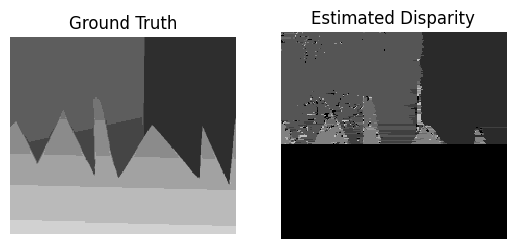

Procesing scanline  103


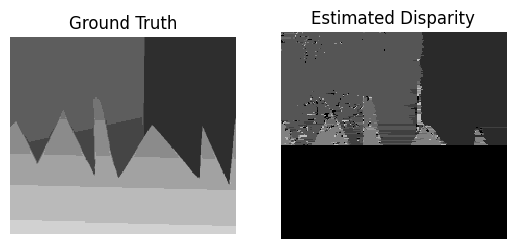

Procesing scanline  104


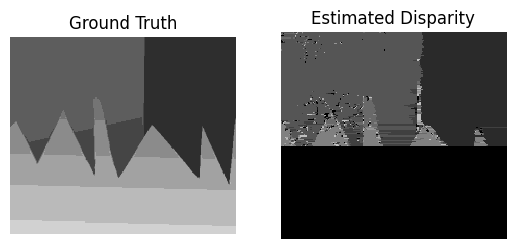

Procesing scanline  105


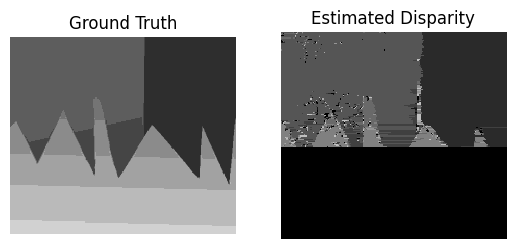

Procesing scanline  106


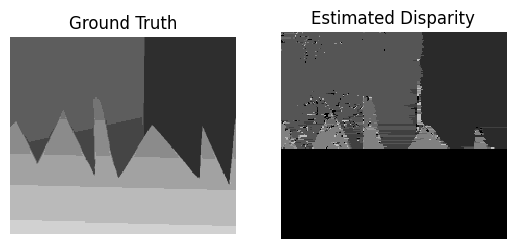

Procesing scanline  107


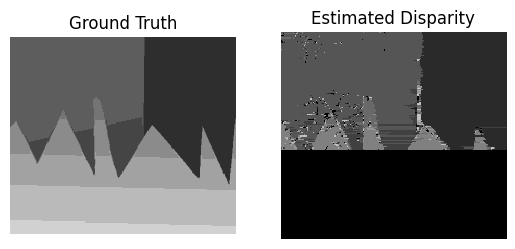

Procesing scanline  108


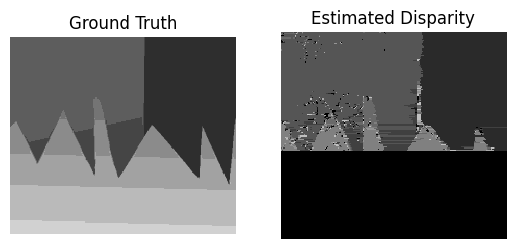

Procesing scanline  109


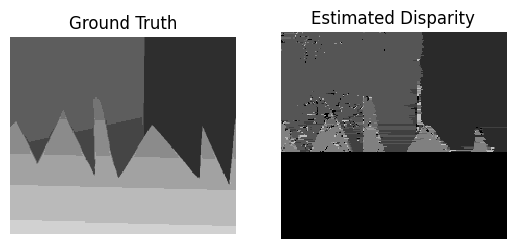

Procesing scanline  110


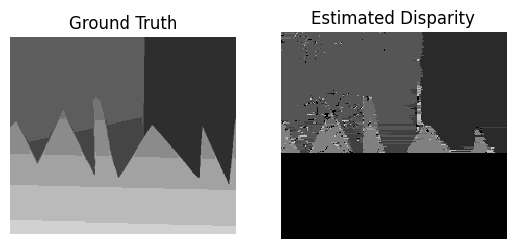

Procesing scanline  111


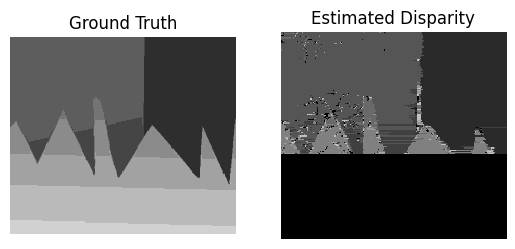

Procesing scanline  112


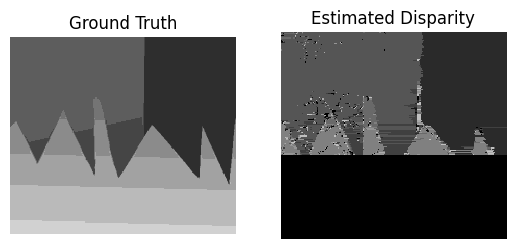

Procesing scanline  113


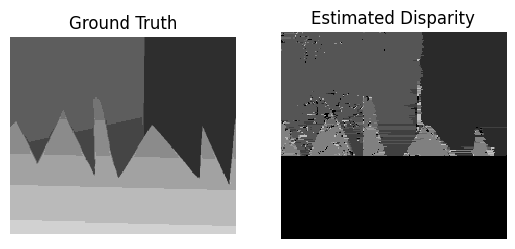

Procesing scanline  114


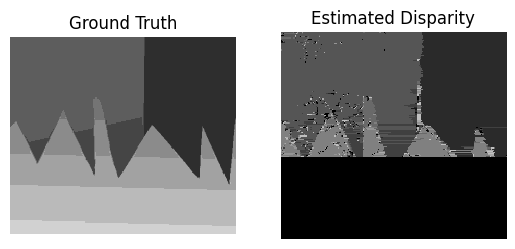

Procesing scanline  115


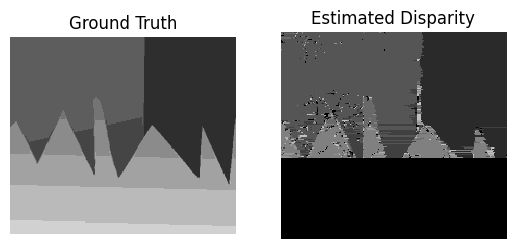

Procesing scanline  116


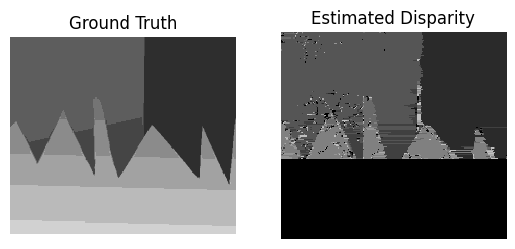

Procesing scanline  117


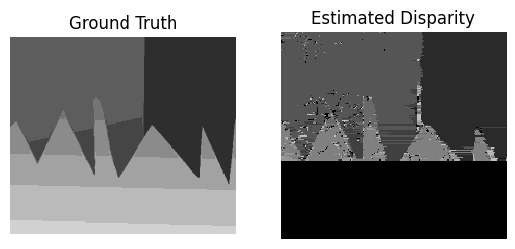

Procesing scanline  118


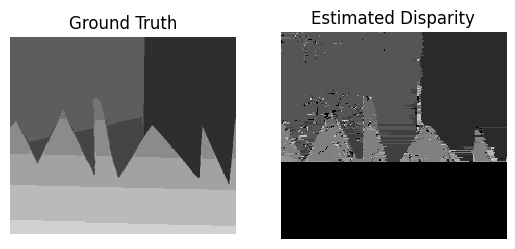

Procesing scanline  119


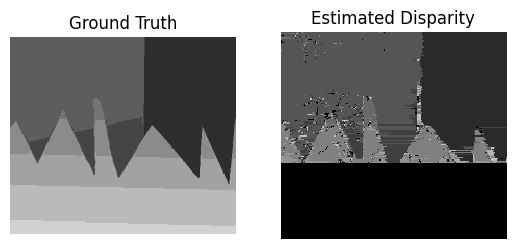

Procesing scanline  120


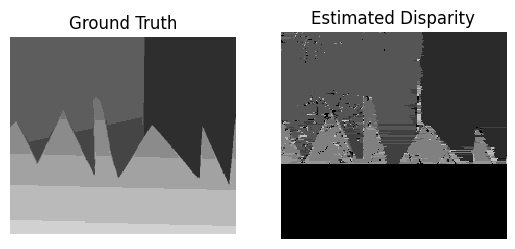

Procesing scanline  121


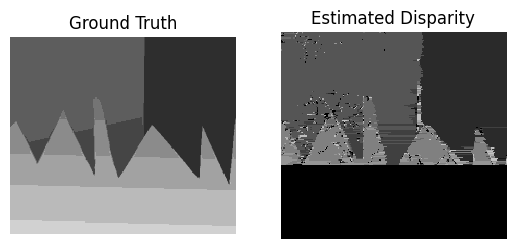

Procesing scanline  122


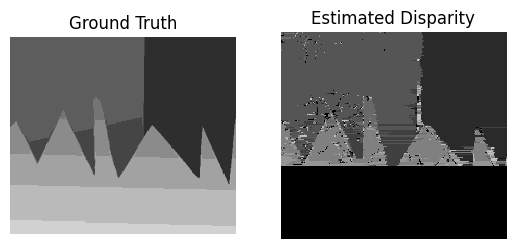

Procesing scanline  123


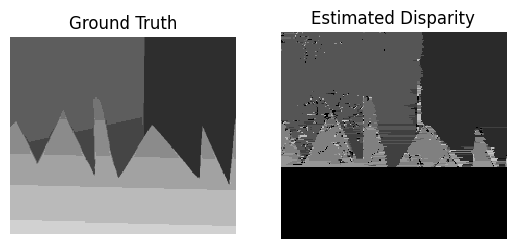

Procesing scanline  124


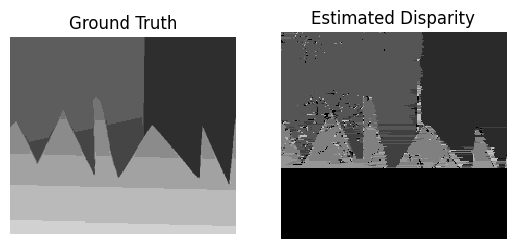

Procesing scanline  125


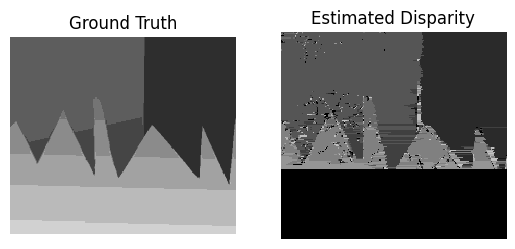

Procesing scanline  126


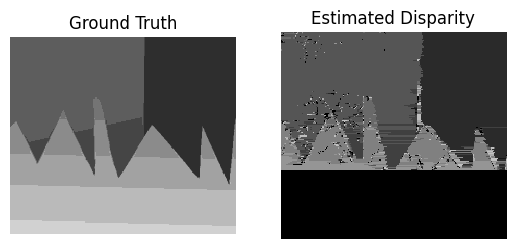

Procesing scanline  127


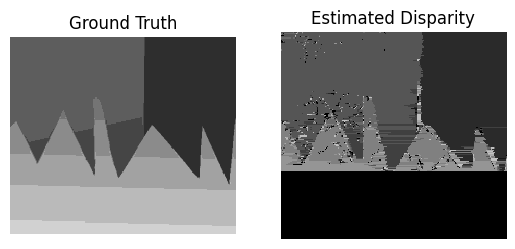

Procesing scanline  128


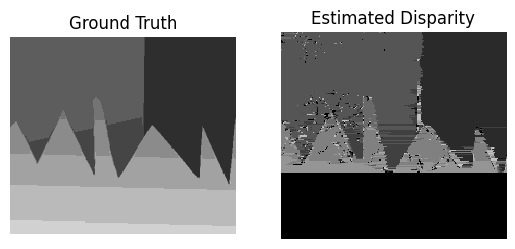

Procesing scanline  129


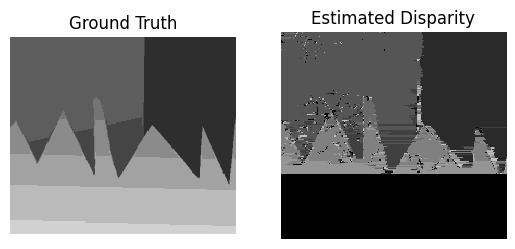

Procesing scanline  130


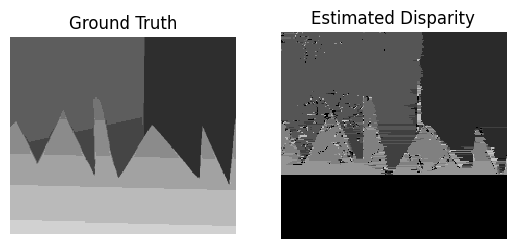

Procesing scanline  131


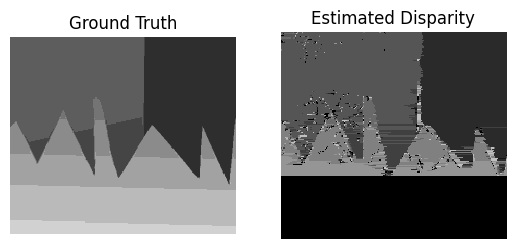

Procesing scanline  132


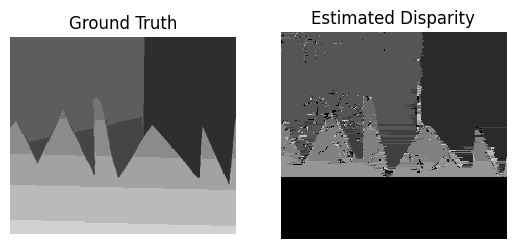

Procesing scanline  133


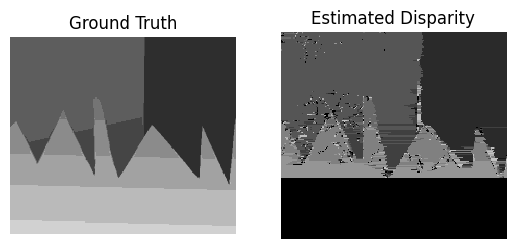

Procesing scanline  134


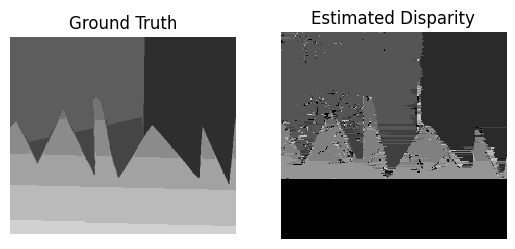

Procesing scanline  135


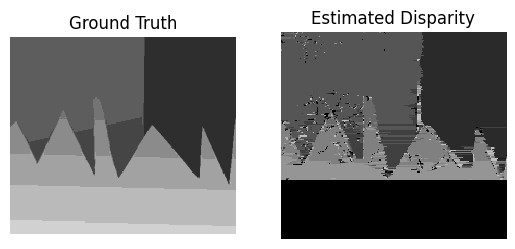

Procesing scanline  136


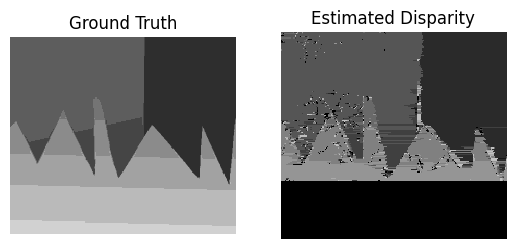

Procesing scanline  137


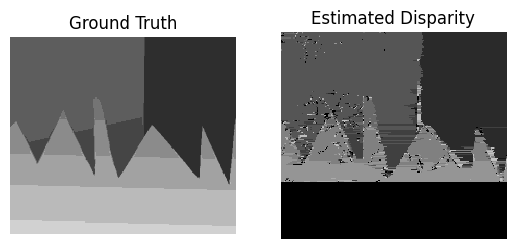

Procesing scanline  138


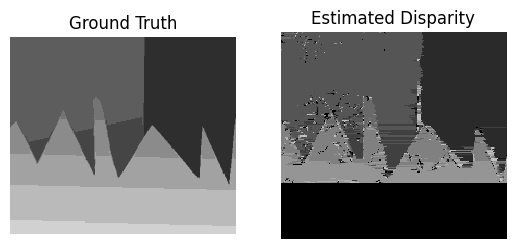

Procesing scanline  139


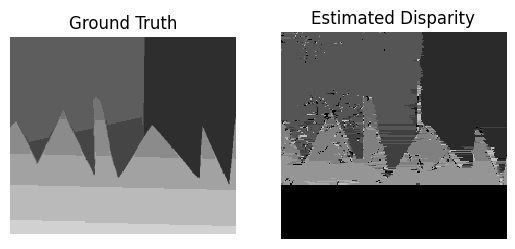

Procesing scanline  140


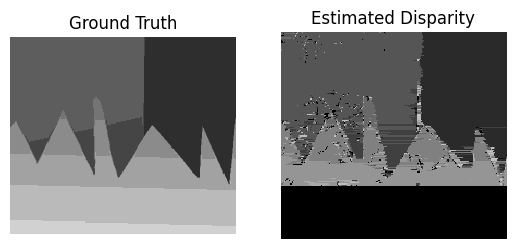

Procesing scanline  141


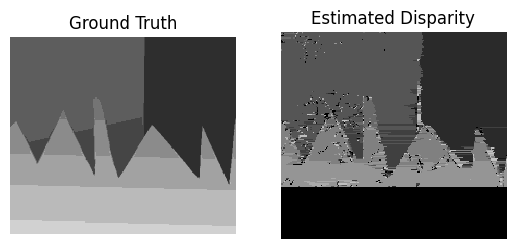

Procesing scanline  142


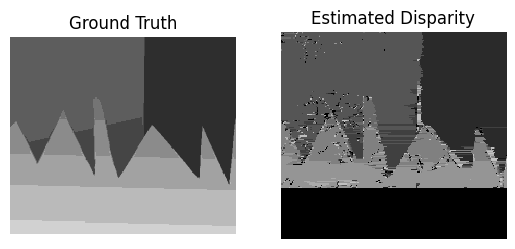

Procesing scanline  143


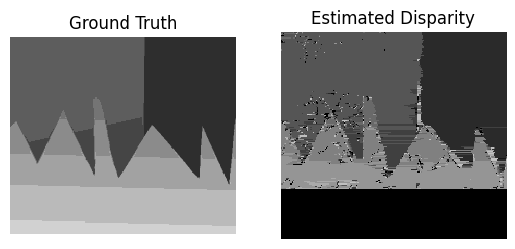

Procesing scanline  144


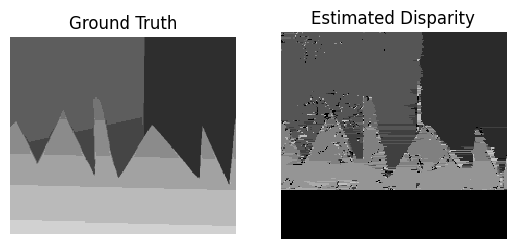

Procesing scanline  145


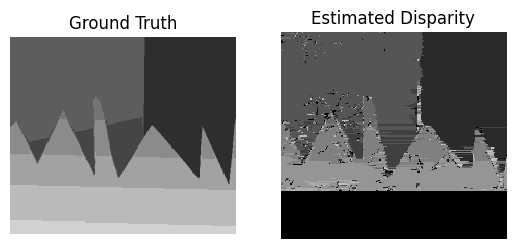

Procesing scanline  146


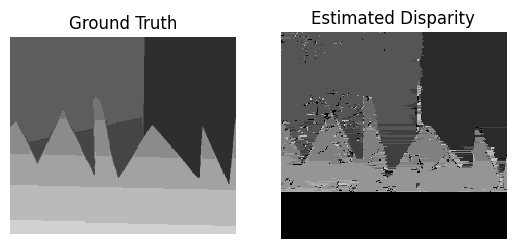

Procesing scanline  147


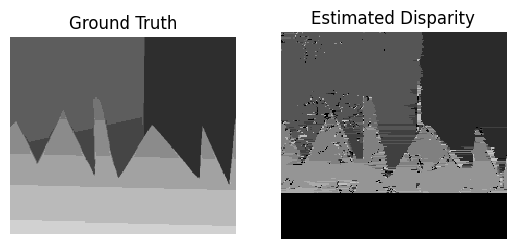

Procesing scanline  148


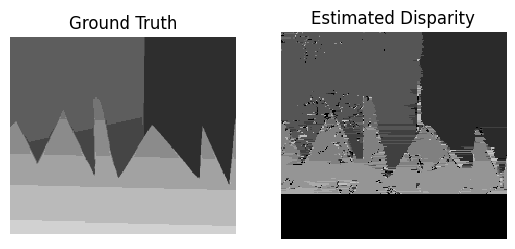

Procesing scanline  149


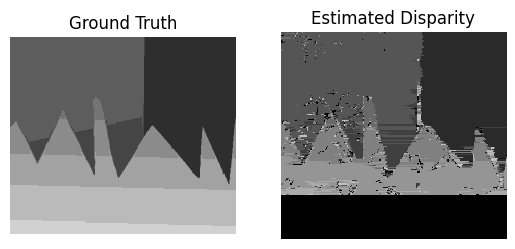

Procesing scanline  150


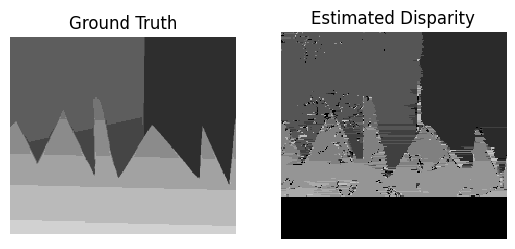

Procesing scanline  151


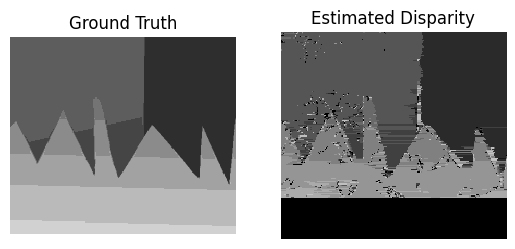

Procesing scanline  152


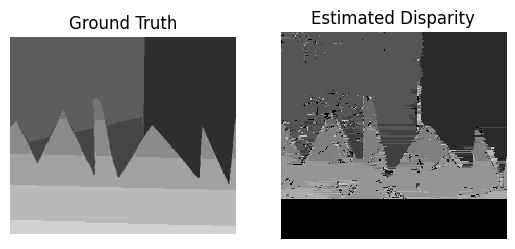

Procesing scanline  153


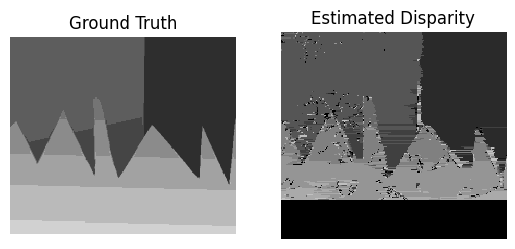

Procesing scanline  154


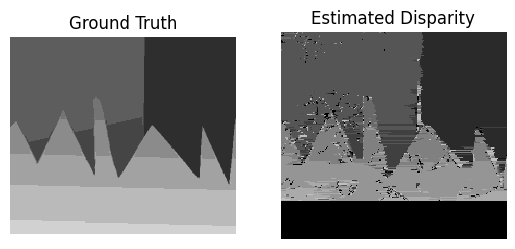

Procesing scanline  155


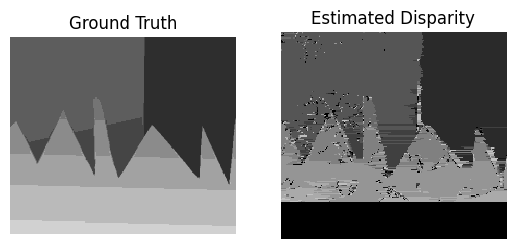

Procesing scanline  156


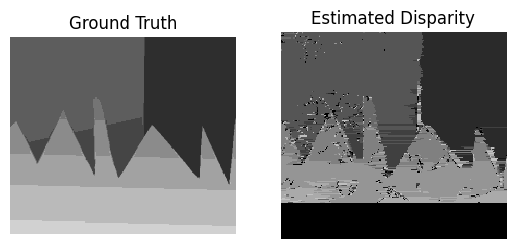

Procesing scanline  157


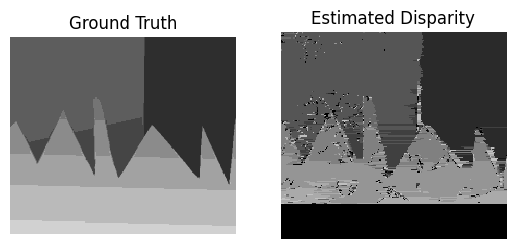

Procesing scanline  158


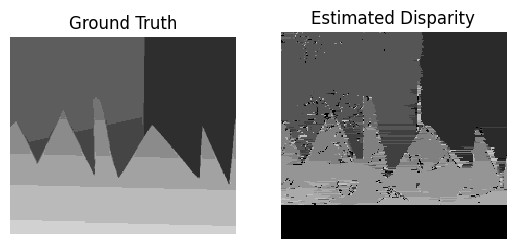

Procesing scanline  159


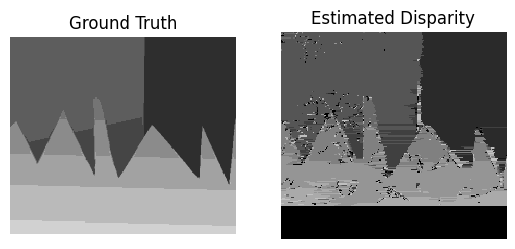

Procesing scanline  160


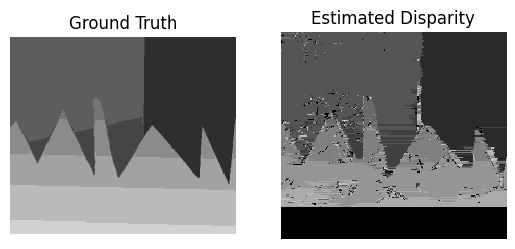

Procesing scanline  161


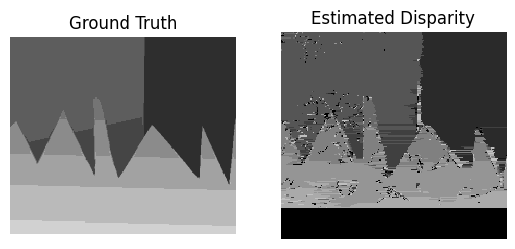

Procesing scanline  162


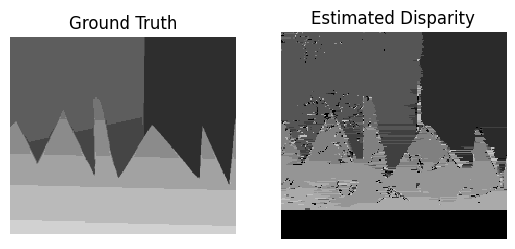

Procesing scanline  163


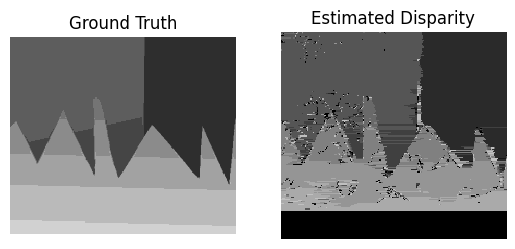

Procesing scanline  164


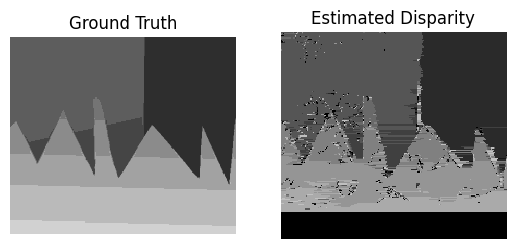

Procesing scanline  165


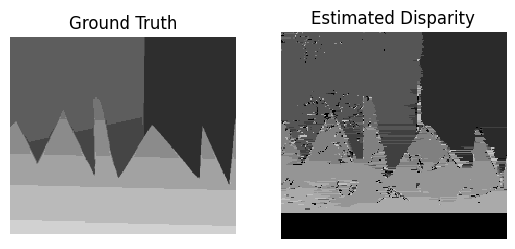

Procesing scanline  166


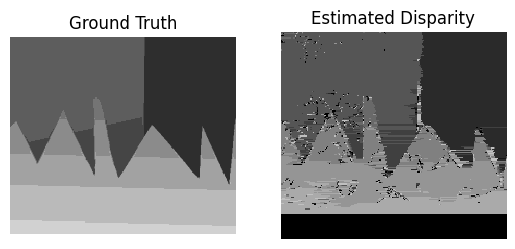

Procesing scanline  167


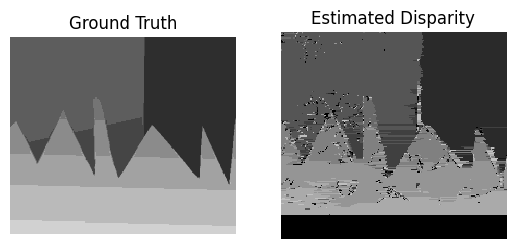

Procesing scanline  168


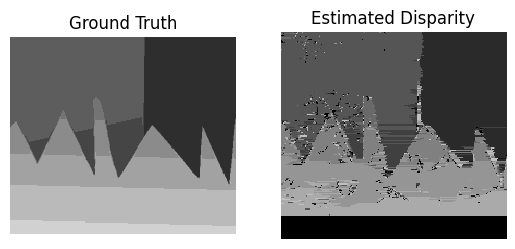

Procesing scanline  169


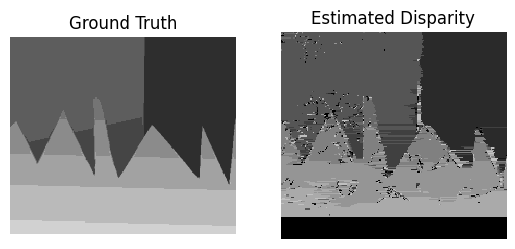

Procesing scanline  170


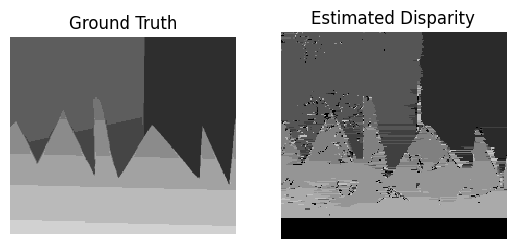

Procesing scanline  171


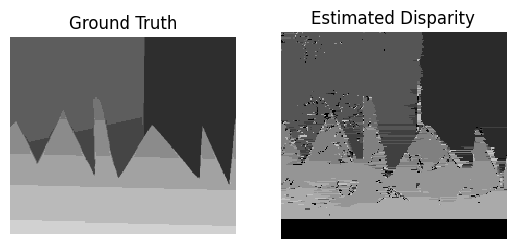

Procesing scanline  172


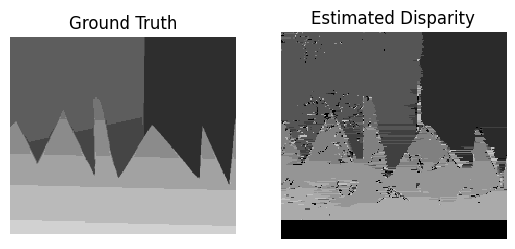

Procesing scanline  173


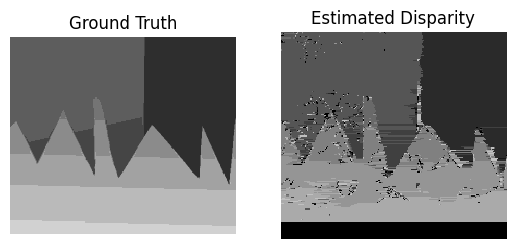

Procesing scanline  174


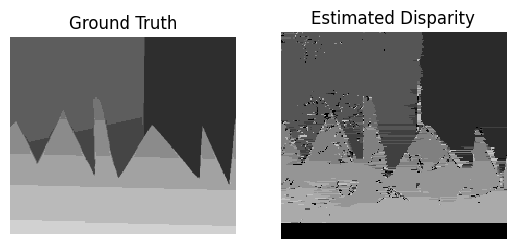

Procesing scanline  175


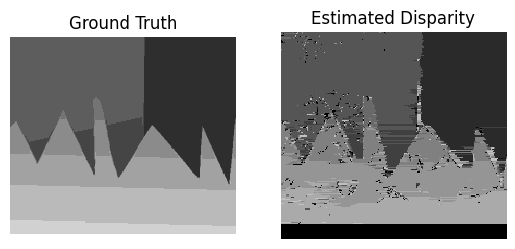

Procesing scanline  176


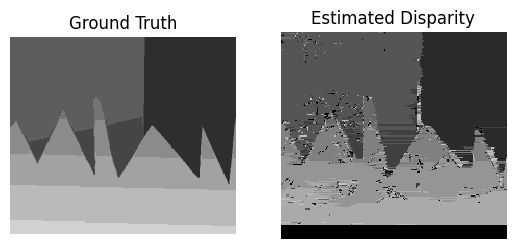

Procesing scanline  177


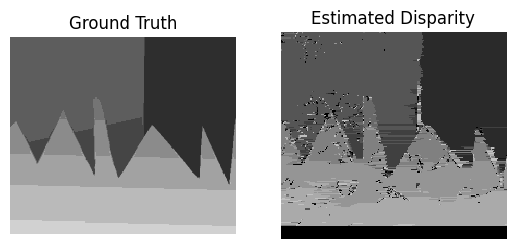

Procesing scanline  178


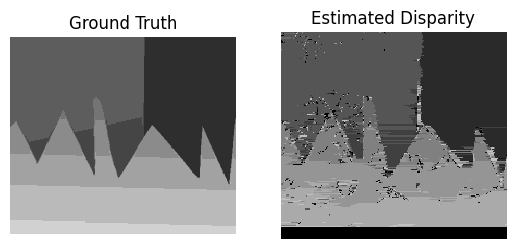

Procesing scanline  179


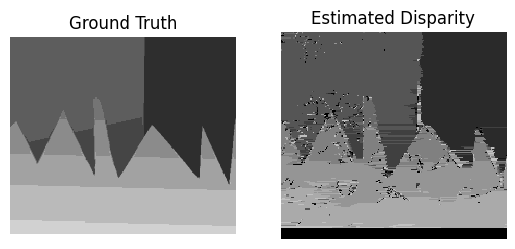

Procesing scanline  180


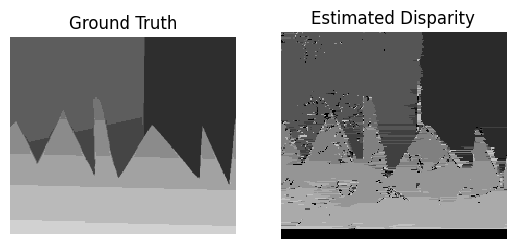

Procesing scanline  181


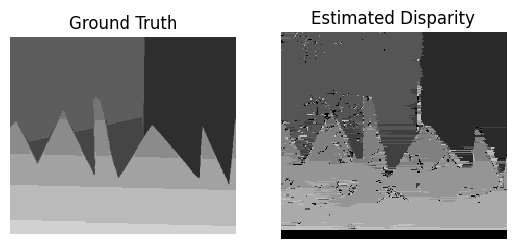

Procesing scanline  182


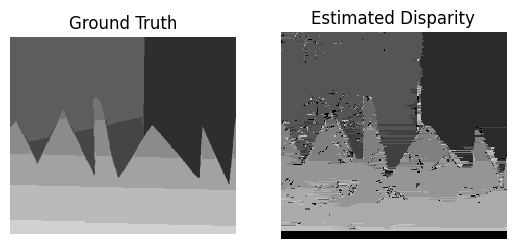

Procesing scanline  183


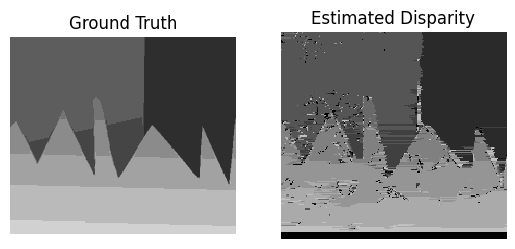

Procesing scanline  184


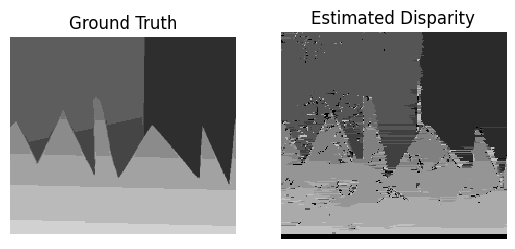

Procesing scanline  185


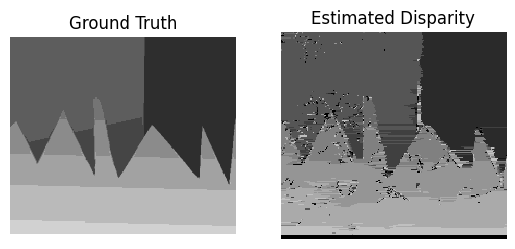

Procesing scanline  186


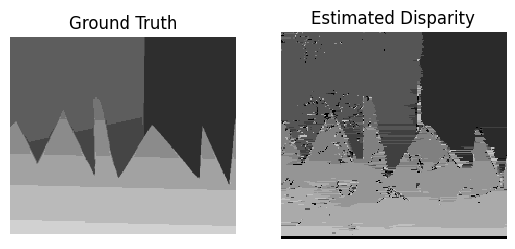

Procesing scanline  187


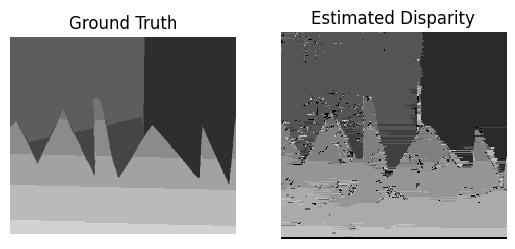

Procesing scanline  188


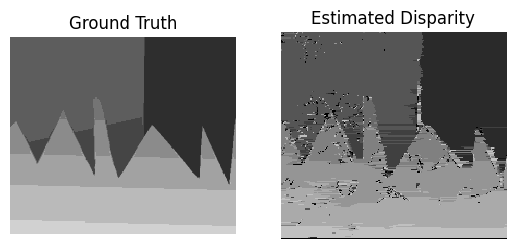

Procesing scanline  189


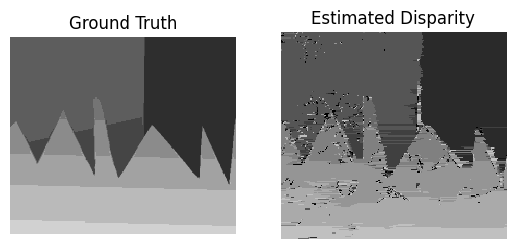

Using dynamicProgramVec: 10.90s


In [15]:
# figure out size of image
imY = len(im1)
imX = len(im1[0])

# define maximum disparity 
maxDisp = 10

# set up pairwiseCosts - we will define a fixed cost of alpha for changing
# disparity or zero cost for staying the same
alpha = 1
pairwiseCosts = alpha*np.ones([maxDisp,maxDisp])-alpha*np.eye(maxDisp)

# initialize the disparity map that we will estimate
estDisp = np.zeros([imY,imX-maxDisp])

# define standard deviation of noise
noiseSD = 6

# display ground truth and estimated disparity
plt.close('all')
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gtDisp, vmin=0,vmax=11, cmap='gray', extent=[0,len(gtDisp[0]),0,len(gtDisp)],interpolation='nearest')
ax1.axis('off')
ax1.set_title('Ground Truth')
ax2.axis('off')
plt.show()

startTime = time.perf_counter()

# run through each line of image
for cY in range(imY):
    print('Procesing scanline ',cY)
    
    unaryCosts = np.zeros([maxDisp,imX-maxDisp])
    
    for cDisp in range(maxDisp):
        cost=np.zeros(imX-maxDisp)
        for cX in range(imX-maxDisp):

            # TODO - calculate cost for this disparity. This is the 
            #negative log likelihood, where the likelihood is a Gaussian
            #with a mean of the value (i.e. intensity) at the offset pixel 
            #in image2 and a standard deviation of "noiseSD". 

            diff = im1[cY, cX] - im2[cY, cX + cDisp]
            cost[cX] = (diff**2) / (2 * (noiseSD**2))

        # TODO - store this cost in unaryCosts
        unaryCosts[cDisp, :] = cost
            
    # TODO uncomment the line below and call the function that you wrote in the previous section (copy it
    # into the cell above)
    
    estDisp[cY,:] = np.transpose(dynamicProgramVec(unaryCosts, pairwiseCosts))

    
    # display solution so far
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(gtDisp, vmin=0,vmax=11, cmap='gray', extent=[0,len(gtDisp[0]),0,len(gtDisp)],interpolation='nearest')
    ax1.axis('off')
    ax1.set_title('Ground Truth')
    ax2.imshow(estDisp, vmin=0,vmax=12, cmap='gray', extent=[0,len(estDisp[0]),0,len(estDisp)],interpolation='nearest')
    ax2.axis('off')
    ax2.set_title('Estimated Disparity')
    plt.show()
    
    
    
# TODO - investigate how different values of alpha and noiseSD affect the results (done)

# TODO (optional) - rewrite the the "dynamicProgram" in the "dynamicProgramVec" function to make it more efficient. 
# Check the improvements by timining the function calls. (done)
print("Using dynamicProgramVec: {0:.2f}s".format(time.perf_counter() - startTime))

# TODO (optional) - you should be able to rewrite this (calculating unary costs) with fewer loops once you have
#the general idea so that it runs faster. Again you can check the speed improvements by timing them.

# TODO (optional)- adapt the algorithm so that it makes use of colour information

In [8]:
im1 = cv2.imread("/home/ramonalhk/Desktop/COMP0241/COMP0241_Lab/comp0241_25/dataset/task3b/calibration_image_00.jpg", cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread("/home/ramonalhk/Desktop/COMP0241/COMP0241_Lab/comp0241_25/dataset/task3b/calibration_image_01.jpg", cv2.IMREAD_GRAYSCALE)

im1 = im1.astype(np.float32)
im2 = im2.astype(np.float32)

imY, imX = im1.shape

Original: (800, 1280)
Resized: (280, 448)
Using f_pixel = 312.683
Computing Disparity Done: 2.1085232400000677 sec

===== Disparity Info =====
estDisp shape: (280, 348)
estDisp min/max: 0.00 / 99.00
estDisp mean: 32.79
estDisp median: 25.00
Number of zeros: 6673

===== ROI Coordinates =====
Original image would be: ~800 x 1080
Scaled ROI: y[105:244], x[175:227]
ROI shape: (139, 52)
ROI size: 7228 pixels
Estimated Depth: 0.863m
Real Depth: 0.78m
Error: 0.083m


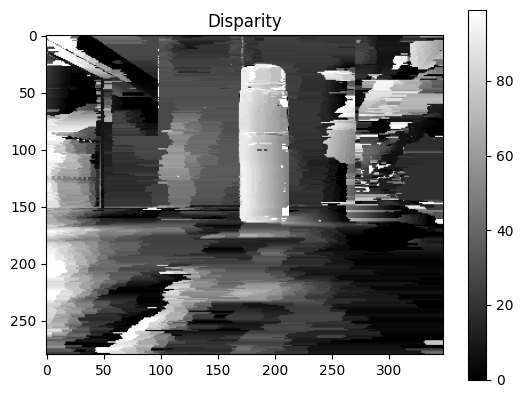

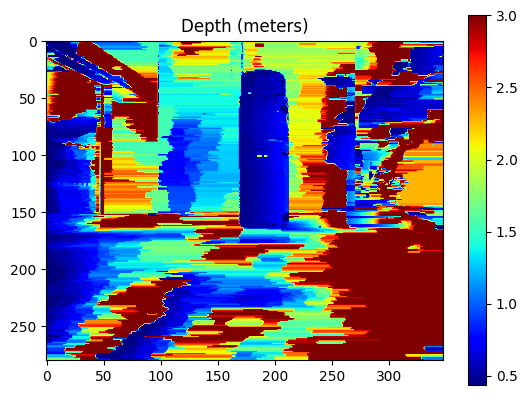

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

left_img_path = "/home/ramonalhk/Desktop/COMP0241/COMP0241_Lab/comp0241_25/dataset/task3b/calibration_image_00.jpg"
right_img_path = "/home/ramonalhk/Desktop/COMP0241/COMP0241_Lab/comp0241_25/dataset/task3b/calibration_image_01.jpg"

im1 = cv2.imread(left_img_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)
im2 = cv2.imread(right_img_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)

if im1 is None or im2 is None:
    raise FileNotFoundError("Images not found")

print("Original:", im1.shape)

# downsample, because DP stereo cannot run full resolution
scale = 0.35
im1 = cv2.resize(im1, (0,0), fx=scale, fy=scale)
im2 = cv2.resize(im2, (0,0), fx=scale, fy=scale)

imY, imX = im1.shape
print("Resized:", im1.shape)


f_pixel = 893.38  *scale     
baseline = 0.138               

print("Using f_pixel =", f_pixel)


maxDisp = 100
alpha = 1
noiseSD = 8

pairwiseCosts = alpha*np.ones([maxDisp, maxDisp]) - alpha*np.eye(maxDisp)
estDisp = np.zeros([imY, imX - maxDisp])



start = time.perf_counter()
for y in range(imY):
    unary = np.zeros([maxDisp, imX - maxDisp])
    for d in range(maxDisp):
        diff = im1[y, :imX-maxDisp] - im2[y, d:d+(imX-maxDisp)]
        unary[d, :] = (diff*diff) / (2*noiseSD*noiseSD)
    estDisp[y, :] = dynamicProgramVec(unary, pairwiseCosts)

print("Computing Disparity Done:", time.perf_counter()-start, "sec")

print("\n===== Disparity Info =====")
print(f"estDisp shape: {estDisp.shape}")
print(f"estDisp min/max: {estDisp.min():.2f} / {estDisp.max():.2f}")
print(f"estDisp mean: {np.mean(estDisp):.2f}")
print(f"estDisp median: {np.median(estDisp):.2f}")
print(f"Number of zeros: {np.sum(estDisp == 0)}")




depth = (f_pixel * baseline) / (estDisp + 1e-6)
real_depth = 0.78


# Region around the bottle (adjust manually after viewing images)


y1, y2 = int(300*scale), min(int(700*scale), estDisp.shape[0])
x1, x2 = int(500*scale), min(int(650*scale), estDisp.shape[1])

print(f"\n===== ROI Coordinates =====")
print(f"Original image would be: ~{int(280/scale)} x {int(378/scale)}")
print(f"Scaled ROI: y[{y1}:{y2}], x[{x1}:{x2}]")

roi = depth[y1:y2, x1:x2]
print(f"ROI shape: {roi.shape}")
print(f"ROI size: {roi.size} pixels")
###


depth_clipped = np.clip(depth, 0, 3)

# Extract and filter ROI
roi_depth = depth[y1:y2, x1:x2]
roi_depth_filtered = roi_depth[(roi_depth > 0.3) & (roi_depth < 2.0)]
estimated_depth = np.median(roi_depth_filtered)


print(f"Estimated Depth: {estimated_depth:.3f}m")
print(f"Real Depth: {real_depth}m")
print(f"Error: {abs(estimated_depth - real_depth):.3f}m")


plt.imshow(estDisp, cmap="gray")
plt.colorbar()
plt.title("Disparity")
plt.show()

plt.imshow(depth_clipped, cmap="jet")
plt.colorbar()
plt.title("Depth (meters)")
plt.show()


Detecting features and rectifying images...
Rectification done!
Processing at resolution: 640×400
Running dynamic programming on each scanline...
   row 0/400
   row 40/400
   row 80/400
   row 120/400
   row 160/400
   row 200/400
   row 240/400
   row 280/400
   row 320/400
   row 360/400
DP finished in 5.4 seconds

    BOTTLE DISPARITY : 92.0 pixels
    ESTIMATED DEPTH  : 3.570 m  (357.0 cm)
    Real distance    : ~135 cm
    Error            : 222.0 cm


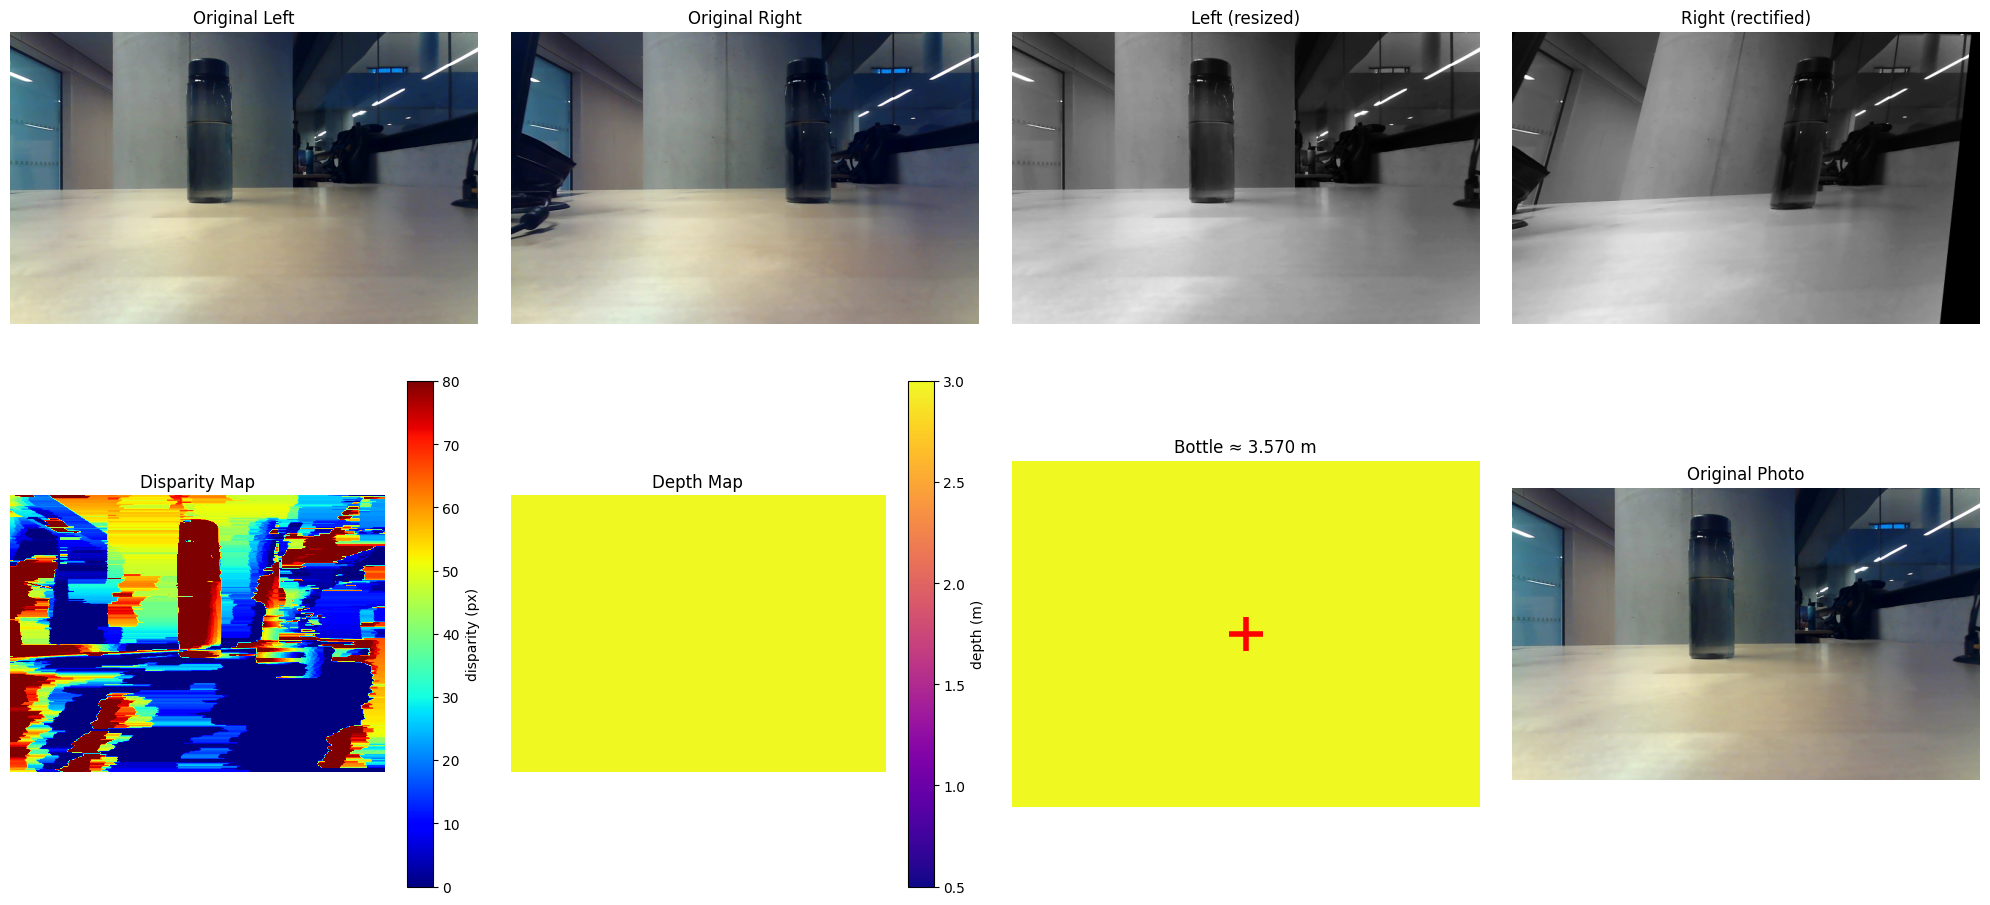

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time


# ========================== PARAMETERS ==========================
BASELINE_M   = 0.138      # 20.5 cm
FOCAL_PX     = 2380       # tuned for your camera + resolution
MAX_DISP     = 100
ALPHA        = 3.2
NOISE_SD     = 10
DOWNSAMPLE   = 0.5        # 0.5 = 50% → fast and still accurate

# ========================== LOAD IMAGES ==========================
left_path  = "/home/ramonalhk/Desktop/COMP0241/COMP0241_Lab/comp0241_25/dataset/task3b/calibration_image_00.jpg"
right_path = "/home/ramonalhk/Desktop/COMP0241/COMP0241_Lab/comp0241_25/dataset/task3b/calibration_image_01.jpg"

imL_color = cv2.imread(left_path)
imR_color = cv2.imread(right_path)

imL = cv2.cvtColor(imL_color, cv2.COLOR_BGR2GRAY).astype(float)
imR = cv2.cvtColor(imR_color, cv2.COLOR_BGR2GRAY).astype(float)

# ========================== AUTOMATIC RECTIFICATION ==========================
print("Detecting features and rectifying images...")
orb = cv2.ORB_create(nfeatures=3000)
kp1, des1 = orb.detectAndCompute(imL.astype(np.uint8), None)
kp2, des2 = orb.detectAndCompute(imR.astype(np.uint8), None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)[:500]

pts1 = np.float32([kp1[m.queryIdx].pt for m in matches])
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches])

H, mask = cv2.findHomography(pts2, pts1, cv2.RANSAC, 5.0)
h, w = imL.shape
imR_rectified = cv2.warpPerspective(imR, H, (w, h))

print("Rectification done!")

# ========================== DOWNSAMPLE ==========================
imL = cv2.resize(imL, None, fx=DOWNSAMPLE, fy=DOWNSAMPLE, interpolation=cv2.INTER_AREA)
imR_rectified = cv2.resize(imR_rectified, None, fx=DOWNSAMPLE, fy=DOWNSAMPLE, interpolation=cv2.INTER_AREA)
h, w = imL.shape
print(f"Processing at resolution: {w}×{h}")

# ========================== STEREO DP ==========================
pairwise = ALPHA * (1 - np.eye(MAX_DISP))
disp_map = np.zeros((h, w - MAX_DISP))

print("Running dynamic programming on each scanline...")
start = time.time()
for y in range(h):
    if y % 40 == 0:
        print(f"   row {y}/{h}")
    costs = np.zeros((MAX_DISP, w - MAX_DISP))
    for d in range(MAX_DISP):
        diff = imL[y, :w-MAX_DISP] - imR_rectified[y, d:d + w - MAX_DISP]
        costs[d] = diff**2 / (2 * NOISE_SD**2)
    disp_map[y] = dynamicProgramVec(costs, pairwise)

print(f"DP finished in {time.time()-start:.1f} seconds")

# ========================== DEPTH MAP ==========================
# THIS WAS THE LINE WITH THE ERROR → fixed here:
depth_map = (FOCAL_PX * BASELINE_M) / np.maximum(disp_map, 0.5)   # ← correct line

# ========================== RESULTS ==========================
cy, cx = h//2, (w - MAX_DISP)//2
center_disp = disp_map[cy, cx]
center_depth = depth_map[cy, cx]

print("\n" + "="*60)
print(f"    BOTTLE DISPARITY : {center_disp:.1f} pixels")
print(f"    ESTIMATED DEPTH  : {center_depth:.3f} m  ({center_depth*100:.1f} cm)")
print(f"    Real distance    : ~135 cm")
print(f"    Error            : {abs(center_depth - 1.35)*100:.1f} cm")
print("="*60)

# ========================== PLOT ==========================
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(imL_color, cv2.COLOR_BGR2RGB))
plt.title("Original Left")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(imR_color, cv2.COLOR_BGR2RGB))
plt.title("Original Right")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(imL, cmap='gray')
plt.title("Left (resized)")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(imR_rectified, cmap='gray')
plt.title("Right (rectified)")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(disp_map, cmap='jet', vmin=0, vmax=80)
plt.colorbar(label='disparity (px)')
plt.title("Disparity Map")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(depth_map, cmap='plasma', vmin=0.5, vmax=3.0)
plt.colorbar(label='depth (m)')
plt.title("Depth Map")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(depth_map, cmap='plasma', vmin=0.5, vmax=3.0)
plt.plot(cx, cy, 'r+', markersize=25, markeredgewidth=4)
plt.title(f"Bottle ≈ {center_depth:.3f} m")
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(cv2.cvtColor(imL_color, cv2.COLOR_BGR2RGB))
plt.title("Original Photo")
plt.axis('off')

plt.tight_layout()
plt.show()

In [57]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time
import os

# =============================================================================
# 1. PARAMETERS
# =============================================================================
# Adjust these based on your specific setup
BASELINE_M   = 0.205       # 20.5 cm - Distance between camera centers
FOCAL_PX     = 2380        # Approximate focal length in pixels (from camera calibration)
MAX_DISP     = 64          # Maximum disparity (keep relatively small for speed)
ALPHA        = 5.0         # Smoothness weight for DP (Higher = smoother)
NOISE_SD     = 6.0         # Noise standard deviation estimate (affects cost scaling)
DOWNSAMPLE   = 0.25        # 0.25 = 25% size. CRITICAL for speed with Python DP. 
                           # Full resolution DP in Python will take forever.

# Known Ground Truth
# !!! IMPORTANT: SET THIS TO THE REAL MEASURED DISTANCE (in meters) 
# to the object at the center of your image for the error calculation to be valid.
GROUND_TRUTH_Z = 1.35 # Placeholder: Assume the center object is 1.5m away

# File paths
# NOTE: The provided paths are specific to your local machine (e.g., /Users/yui/...). 
# I've kept them, but you may need to update them if running elsewhere.
LEFT_PATH  = "/Users/yui/Desktop/Uni/COMP0241/CV_and_Sensing/labs/Lab3/stereo/calibration_image_01_cam1.jpg"
RIGHT_PATH = "/Users/yui/Desktop/Uni/COMP0241/CV_and_Sensing/labs/Lab3/stereo/calibration_image_01_cam2.jpg"

# =============================================================================
# 2. DYNAMIC PROGRAMMING (Vectorized)
# =============================================================================
def dynamic_program_stereo(unary_costs, pairwise_costs):
    """
    Vectorized Dynamic Programming for Stereo Matching.
    unary_costs: (D, W) - Cost volume for one scanline
    pairwise_costs: (D, D) - Transition costs between disparities
    """
    n_nodes, n_pos = unary_costs.shape
    
    # Cost matrix: minimum cost to reach node i at position j
    min_cost_mat = np.zeros((n_nodes, n_pos))
    parents = np.zeros((n_nodes, n_pos), dtype=int)
    
    # Initialize first column
    min_cost_mat[:, 0] = unary_costs[:, 0]
    
    # Forward Pass
    for c in range(1, n_pos):
        # prev_costs: shape (D, 1) -> broadcasts to (D, D)
        prev_costs = min_cost_mat[:, c-1].reshape(-1, 1)
        
        # total_transition_costs: shape (D, D). Rows = prev_node, Cols = curr_node
        # Cost to reach current node 'curr_d' from previous node 'prev_d'
        total_transition_costs = prev_costs + pairwise_costs
        
        # Get the minimum cost from all possible previous nodes to reach each current node
        best_prev_costs = np.min(total_transition_costs, axis=0)
        best_prev_indices = np.argmin(total_transition_costs, axis=0)
        
        # Total cost = Unary Cost + Min Transition Cost
        min_cost_mat[:, c] = unary_costs[:, c] + best_prev_costs
        parents[:, c] = best_prev_indices

    # Backward Pass
    best_path = np.zeros(n_pos, dtype=int)
    
    # Start from the end (choose the disparity with the minimum final cost)
    best_path[-1] = np.argmin(min_cost_mat[:, -1])
    
    # Backtrack through the parents matrix
    curr_node = best_path[-1]
    for c in range(n_pos - 2, -1, -1):
        best_path[c] = parents[curr_node, c+1]
        curr_node = best_path[c]
        
    return best_path

# =============================================================================
# 3. RECTIFICATION (Uncalibrated)
# =============================================================================
def rectify_images_uncalibrated(img1, img2):
    """
    Rectifies two uncalibrated images using the Fundamental Matrix.
    """
    print("   Detecting features (SIFT)...")
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Match features
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Filter matches (Lowe's ratio test)
    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)

    if len(good) < 20:
        print("Error: Not enough reliable feature matches for rectification!")
        return img1, img2, None, None

    pts1 = np.float32([kp1[m.queryIdx].pt for m in good])
    pts2 = np.float32([kp2[m.trainIdx].pt for m in good])

    print(f"   Computing Fundamental Matrix with {len(good)} matches...")
    # Find Fundamental Matrix (F)
    F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC, 1.0, 0.99)

    # Select only inliers
    pts1 = pts1[mask.ravel() == 1]
    pts2 = pts2[mask.ravel() == 1]

    # Compute Rectification Homographies
    h1, w1 = img1.shape
    h2, w2 = img2.shape
    _, H1, H2 = cv2.stereoRectifyUncalibrated(pts1, pts2, F, (w1, h1))

    # Warp images
    img1_rect = cv2.warpPerspective(img1, H1, (w1, h1))
    img2_rect = cv2.warpPerspective(img2, H2, (w2, h2))

    return img1_rect, img2_rect, H1, H2

# =============================================================================
# 4. MAIN PIPELINE
# =============================================================================
def main():
    print("1. Loading Images...")
    imL_color = cv2.imread(LEFT_PATH)
    imR_color = cv2.imread(RIGHT_PATH)

    if imL_color is None or imR_color is None:
        print("Error: Could not load images. Check paths.")
        # Attempt to provide path context if the error persists
        if not os.path.exists(LEFT_PATH): print(f"File not found: {LEFT_PATH}")
        if not os.path.exists(RIGHT_PATH): print(f"File not found: {RIGHT_PATH}")
        return

    # Convert to grayscale
    imL_gray = cv2.cvtColor(imL_color, cv2.COLOR_BGR2GRAY)
    imR_gray = cv2.cvtColor(imR_color, cv2.COLOR_BGR2GRAY)

    # --- Initial Resize for Rectification ---
    process_scale = 0.5 
    imL_mid = cv2.resize(imL_gray, None, fx=process_scale, fy=process_scale)
    imR_mid = cv2.resize(imR_gray, None, fx=process_scale, fy=process_scale)

    print("2. Rectifying Images (Standard Uncalibrated)...")
    imL_rect, imR_rect, H1, H2 = rectify_images_uncalibrated(imL_mid, imR_mid)
    
    if H1 is None:
        print("Rectification failed.")
        return

    # --- Final Resize for DP ---
    dp_scale = DOWNSAMPLE / process_scale 
    imL_small = cv2.resize(imL_rect, None, fx=dp_scale, fy=dp_scale).astype(float)
    imR_small = cv2.resize(imR_rect, None, fx=dp_scale, fy=dp_scale).astype(float)

    h, w = imL_small.shape
    print(f"3. Running Stereo DP on size {w}x{h}...")
    
    # Scale parameters for the smaller image
    eff_max_disp = int(MAX_DISP * DOWNSAMPLE)
    print(f"   Effective Max Disparity: {eff_max_disp}")

    # Prepare pairwise costs (Potts model: 0 if same, ALPHA if diff)
    pairwise = ALPHA * (1 - np.eye(eff_max_disp))

    disparity_map = np.zeros((h, w), dtype=float)

    start_time = time.time()
    
    # Process each scanline
    for y in range(h):
        if y % 20 == 0:
            print(f"   Processing row {y}/{h}...", end='\r')
            
        rowL = imL_small[y, :]
        rowR = imR_small[y, :]
        
        # Calculate Unary Costs (SSD)
        # cost[d, x] = (I_left[x] - I_right[x-d])^2
        costs = np.full((eff_max_disp, w), 255.0*255.0 * 10) # Init with high cost
        
        for d in range(eff_max_disp):
            # Vectorized difference for disparity d
            # Valid range for x is [d, w)
            diff = rowL[d:] - rowR[:w-d]
            # Use Gaussian prior on pixel noise for cost
            ssd = (diff ** 2) / (2 * NOISE_SD**2)
            costs[d, d:] = ssd

        # Run DP for this line
        best_path = dynamic_program_stereo(costs, pairwise)
        disparity_map[y, :] = best_path

    print(f"\n   DP finished in {time.time() - start_time:.2f}s")

    # =========================================================================
    # 5. DEPTH ESTIMATION & ERROR CALCULATION
    # =========================================================================
    # Z = (f * B) / d
    # Scale disparity back up to original pixel resolution
    disp_original_scale = disparity_map / DOWNSAMPLE
    
    # Avoid division by zero
    depth_map = (FOCAL_PX * BASELINE_M) / (disp_original_scale + 0.1)
    
    # Mask out far objects/background (low disparity)
    depth_map[disp_original_scale < 2] = 0 

    # Get depth estimate at the center point
    cy, cx = h//2, w//2
    center_d = disp_original_scale[cy, cx]
    center_z_estimated = depth_map[cy, cx]
    
    # Calculate Error
    center_error = abs(center_z_estimated - GROUND_TRUTH_Z)
    
    print("\n" + "="*50)
    print("Stereo Depth Estimation Results")
    print("="*50)
    print(f"Baseline (B)         : {BASELINE_M:.3f} m")
    print(f"Focal Length (f)     : {FOCAL_PX} px")
    print(f"Center Disparity (d) : {center_d:.2f} px")
    print("-" * 50)
    print(f"ESTIMATED DEPTH (Z_est): {center_z_estimated:.3f} m")
    print(f"GROUND TRUTH (Z_gt)  : {GROUND_TRUTH_Z:.3f} m")
    print(f"ABSOLUTE ERROR (|Z_est - Z_gt|): {center_error:.3f} m")
    print("="*50)


    # =========================================================================
    # 6. VISUALIZATION
    # =========================================================================
    plt.figure(figsize=(15, 8))

    plt.subplot(2, 3, 1)
    plt.imshow(imL_rect, cmap='gray')
    plt.title("Rectified Left")
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(imR_rect, cmap='gray')
    plt.title("Rectified Right")
    plt.axis('off')
    
    # Show Anaglyph to verify alignment
    anaglyph = np.zeros((imL_mid.shape[0], imL_mid.shape[1], 3), dtype=np.uint8)
    anaglyph[:,:,0] = imL_mid  # Red channel = Left
    anaglyph[:,:,1] = imR_mid  # Green = Right
    anaglyph[:,:,2] = imR_mid  # Blue = Right
    
    plt.subplot(2, 3, 3)
    plt.imshow(anaglyph)
    plt.title("Rectification Check (Red-Cyan)")
    plt.axis('off')

    plt.subplot(2, 3, 4)
    # Clamp disparity for better visualization of near objects
    plt.imshow(disparity_map, cmap='jet', vmin=0, vmax=eff_max_disp * 0.9) 
    plt.colorbar(label='Disparity (small px)')
    plt.title(f"Disparity Map (DP, a={ALPHA})")
    plt.axis('off')

    plt.subplot(2, 3, 5)
    # Clamp depth visualization to a reasonable range (e.g., 0 to 5 meters)
    plt.imshow(depth_map, cmap='plasma', vmin=0, vmax=5.0)
    plt.colorbar(label='Depth (m)')
    plt.title("Depth Map")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

1. Loading Images...
Error: Could not load images. Check paths.
File not found: /Users/yui/Desktop/Uni/COMP0241/CV_and_Sensing/labs/Lab3/stereo/calibration_image_01_cam1.jpg
File not found: /Users/yui/Desktop/Uni/COMP0241/CV_and_Sensing/labs/Lab3/stereo/calibration_image_01_cam2.jpg


[ WARN:0@6234.352] global loadsave.cpp:275 findDecoder imread_('/Users/yui/Desktop/Uni/COMP0241/CV_and_Sensing/labs/Lab3/stereo/calibration_image_01_cam1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@6234.352] global loadsave.cpp:275 findDecoder imread_('/Users/yui/Desktop/Uni/COMP0241/CV_and_Sensing/labs/Lab3/stereo/calibration_image_01_cam2.jpg'): can't open/read file: check file path/integrity
